In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\DELL\anaconda3\envs\AI_env\Lib\site-packages\pandas\core\computation\expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.10.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# explore data

In [2]:
data = pd.read_csv('C:\\Users\\DELL\\Desktop\\Predective maintainance\\dataset\\ai4i2020.csv')

In [3]:
data.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [4]:
data.info() 

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  str    
 2   Type                     10000 non-null  str    
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9), str(2)
me

In [5]:
data.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

In [6]:
label_col = "Machine failure"

groups = dict(tuple(data.groupby(label_col)))
df_label_0 = groups.get(0, pd.DataFrame())
df_label_1 = groups.get(1, pd.DataFrame())

print("rows label 0:", len(df_label_0))
print("rows label 1:", len(df_label_1))

rows label 0: 9661
rows label 1: 339


In [7]:
target_col = "Machine failure"  

agg_df = data.groupby(target_col).agg(
    count=("UDI", "count"),
    air_temp_mean=("Air temperature [K]", "mean"),
    process_temp_mean=("Process temperature [K]", "mean"),
    torque_mean=("Torque [Nm]", "mean"),
    speed_mean=("Rotational speed [rpm]", "mean"),
    tool_wear_mean=("Tool wear [min]", "mean"),
)
agg_df


count  air_temp_mean  process_temp_mean  torque_mean  \
Machine failure                                                         
0                 9661     299.973999         309.995570    39.629655   
1                  339     300.886431         310.290265    50.168142   

                  speed_mean  tool_wear_mean  
Machine failure                               
0                1540.260014      106.693717  
1                1496.486726      143.781711

In [8]:
# assumes ai4i2020 column names from the dataset
target_col = "Machine failure"
failure_cols = ["TWF", "HDF", "PWF", "OSF", "RNF"]

# aggregate counts of each failure mode by target label
agg_df = data.groupby(target_col)[failure_cols].sum()
agg_df


TWF  HDF  PWF  OSF  RNF
Machine failure                         
0                  0    0    0    0   18
1                 46  115   95   98    1

In [9]:
data[data['Machine failure'] == 1].head(10)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
50    51     L47230    L                298.9                    309.1   
69    70     L47249    L                298.9                    309.0   
77    78     L47257    L                298.8                    308.9   
160  161     L47340    L                298.4                    308.2   
161  162     L47341    L                298.3                    308.1   
168  169     L47348    L                298.4                    308.3   
194  195     M15054    M                298.2                    308.5   
207  208     M15067    M                298.4                    308.7   
242  243     L47422    L                298.0                    308.2   
248  249     L47428    L                298.0                    308.3   

     Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
50                     2861          4.6              143                1   
69                     1410         65.7              191                1   
77                     1455         41.3              208                1   
160                    1282         60.7              216                1   
161                    1412         52.3              218                1   
168                    1433         62.3               20                1   
194                    2678         10.7               86                1   
207                    1421         60.7              119                1   
242                    1348         58.8              202                1   
248                    1362         56.8              216                1   

     TWF  HDF  PWF  OSF  RNF  
50     0    0    1    0    0  
69     0    0    1    1    0  
77     1    0    0    0    0  
160    0    0    0    1    0  
161    0    0    0    1    0  
168    0    0    1    0    0  
194    0    0    1    0    0  
207    0    0    1    0    0  
242    0    0    0    1    0  
248    0    0    0    1    0

In [10]:
pid_letter = data["Product ID"].str[0]
mask = pid_letter != data["Type"]
mismatched = data.loc[mask, ["Product ID", "Type"]]

mismatched


Empty DataFrame
Columns: [Product ID, Type]
Index: []

In [11]:
# rows where Machine failure == 1 and all five failure modes == 0
failure_cols = ["TWF", "HDF", "PWF", "OSF", "RNF"]

mask = (data["Machine failure"] == 1) & (data[failure_cols].sum(axis=1) == 0)
rows = data.loc[mask]

rows



UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
1437  1438     H30851    H                298.8                    309.9   
2749  2750     M17609    M                299.7                    309.2   
4044  4045     M18904    M                301.9                    310.9   
4684  4685     M19544    M                303.6                    311.8   
5536  5537     M20396    M                302.3                    311.8   
5941  5942     L53121    L                300.6                    310.7   
6478  6479     L53658    L                300.5                    309.8   
8506  8507     L55686    L                298.4                    309.6   
9015  9016     L56195    L                297.2                    308.1   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
1437                    1439         45.2               40                1   
2749                    1685         28.9              179                1   
4044                    1419         47.7               20                1   
4684                    1421         44.8              101                1   
5536                    1363         54.0              119                1   
5941                    1438         48.5               78                1   
6478                    1663         29.1              145                1   
8506                    1710         27.3              163                1   
9015                    1431         49.7              210                1   

      TWF  HDF  PWF  OSF  RNF  
1437    0    0    0    0    0  
2749    0    0    0    0    0  
4044    0    0    0    0    0  
4684    0    0    0    0    0  
5536    0    0    0    0    0  
5941    0    0    0    0    0  
6478    0    0    0    0    0  
8506    0    0    0    0    0  
9015    0    0    0    0    0

In [12]:
print(f'{len(rows)} rows where Machine failure == 1 and all five failure modes == 0')

9 rows where Machine failure == 1 and all five failure modes == 0


In [13]:
failure_cols = ["TWF", "HDF", "PWF", "OSF", "RNF"]

mask = (data["Machine failure"] == 0) & (data[failure_cols].sum(axis=1) == 1)
rows = data.loc[mask]

rows


UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
1221  1222     M16081    M                297.0                    308.3   
1302  1303     L48482    L                298.6                    309.8   
1748  1749     H31162    H                298.4                    307.7   
2072  2073     L49252    L                299.6                    309.5   
2559  2560     L49739    L                299.3                    309.0   
3065  3066     M17925    M                300.1                    309.2   
3452  3453     H32866    H                301.6                    310.5   
5471  5472     L52651    L                302.7                    312.3   
5489  5490     L52669    L                302.6                    312.1   
5495  5496     H34909    H                302.9                    312.5   
5509  5510     L52689    L                302.8                    312.2   
5553  5554     L52733    L                302.5                    311.9   
5639  5640     L52819    L                302.6                    312.1   
6091  6092     L53271    L                300.9                    310.7   
6913  6914     L54093    L                300.8                    311.2   
6960  6961     L54140    L                300.7                    311.0   
7488  7489     L54668    L                300.3                    311.7   
7868  7869     H37282    H                300.4                    311.9   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
1221                    1399         46.4              132                0   
1302                    1505         45.7              144                0   
1748                    1626         31.1              166                0   
2072                    1570         35.5              189                0   
2559                    1447         50.4              140                0   
3065                    1687         27.7               95                0   
3452                    1602         32.3                2                0   
5471                    1346         61.2              170                0   
5489                    1499         35.0              215                0   
5495                    1357         55.0               12                0   
5509                    1509         36.5               52                0   
5553                    1306         59.7              172                0   
5639                    1668         28.7              180                0   
6091                    1412         57.5               16                0   
6913                    1481         38.5              181                0   
6960                    1413         52.0               91                0   
7488                    1545         43.5              160                0   
7868                    1438         46.7               41                0   

      TWF  HDF  PWF  OSF  RNF  
1221    0    0    0    0    1  
1302    0    0    0    0    1  
1748    0    0    0    0    1  
2072    0    0    0    0    1  
2559    0    0    0    0    1  
3065    0    0    0    0    1  
3452    0    0    0    0    1  
5471    0    0    0    0    1  
5489    0    0    0    0    1  
5495    0    0    0    0    1  
5509    0    0    0    0    1  
5553    0    0    0    0    1  
5639    0    0    0    0    1  
6091    0    0    0    0    1  
6913    0    0    0    0    1  
6960    0    0    0    0    1  
7488    0    0    0    0    1  
7868    0    0    0    0    1

In [14]:
print(f'{len(rows)} rows where Machine failure == 0 and exactly one failure mode == 1')

18 rows where Machine failure == 0 and exactly one failure mode == 1


In [15]:
failure_cols = ["TWF", "HDF", "PWF", "OSF", "RNF"]

mask1 = (data["Machine failure"] == 1) & (data[failure_cols].sum(axis=1) == 0)
mask2 = (data["Machine failure"] == 0) & (data[failure_cols].sum(axis=1) == 1)

df_pre = data.loc[~(mask1 | mask2)].copy()

In [16]:
df_pre.shape

(9973, 14)

In [17]:
df_pre.drop(columns=["RNF","UDI","Product ID"], inplace=True)

In [18]:
df_pre.reset_index(inplace=True, drop=True)

In [19]:
df_pre.info()

<class 'pandas.DataFrame'>
RangeIndex: 9973 entries, 0 to 9972
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9973 non-null   str    
 1   Air temperature [K]      9973 non-null   float64
 2   Process temperature [K]  9973 non-null   float64
 3   Rotational speed [rpm]   9973 non-null   int64  
 4   Torque [Nm]              9973 non-null   float64
 5   Tool wear [min]          9973 non-null   int64  
 6   Machine failure          9973 non-null   int64  
 7   TWF                      9973 non-null   int64  
 8   HDF                      9973 non-null   int64  
 9   PWF                      9973 non-null   int64  
 10  OSF                      9973 non-null   int64  
dtypes: float64(3), int64(7), str(1)
memory usage: 868.1 KB


In [20]:
df_pre.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  
0         42.8                0                0    0    0    0    0  
1         46.3                3                0    0    0    0    0  
2         49.4                5                0    0    0    0    0  
3         39.5                7                0    0    0    0    0  
4         40.0                9                0    0    0    0    0

In [21]:
df_pre.rename(columns={
    "Air temperature [K]": "Air temperature",
    "Process temperature [K]": "Process temperature",
    "Rotational speed [rpm]": "Rotational speed",
    "Torque [Nm]": "Torque",
    "Tool wear [min]": "Tool wear",
}, inplace=True)


In [22]:
df_pre.shape

(9973, 11)

In [23]:
failure_cols = ["TWF", "HDF", "PWF", "OSF"]

rows_multi = df_pre.loc[df_pre[failure_cols].sum(axis=1) > 1]
rows_multi

Type  Air temperature  Process temperature  Rotational speed  Torque  \
69      L            298.9                309.0              1410    65.7   
1322    M            298.8                310.1              1243    74.5   
1493    L            298.0                308.7              1268    69.4   
3845    L            302.4                311.0              1338    67.6   
3934    L            302.3                311.4              1333    66.7   
4244    L            302.6                311.0              1284    68.0   
4332    M            301.7                309.8              1284    68.2   
4360    L            302.0                309.9              1308    57.6   
4373    L            301.7                309.5              1298    65.5   
4407    L            302.6                310.4              1365    66.8   
4452    L            302.7                310.5              1263    67.8   
4632    L            303.2                311.4              1238    54.6   
4633    L            303.2                311.4              1324    54.2   
4718    L            303.4                311.8              1306    61.0   
5383    M            302.8                312.3              1262    70.5   
5390    M            302.6                312.3              1454    54.8   
5891    H            300.7                310.2              1364    65.3   
6228    L            300.8                310.1              1405    61.2   
7060    L            300.7                310.4              1416    61.8   
8820    M            297.4                308.8              1325    62.4   
8900    M            297.3                308.3              1459    59.6   
9057    L            297.2                307.9              1326    75.4   
9947    L            298.6                308.2              1361    68.2   

      Tool wear  Machine failure  TWF  HDF  PWF  OSF  
69          191                1    0    0    1    1  
1322        194                1    0    0    1    1  
1493        189                1    0    0    1    1  
3845        194                1    0    0    1    1  
3934        205                1    0    0    1    1  
4244        114                1    0    1    1    0  
4332        111                1    0    1    1    0  
4360        197                1    0    1    0    1  
4373        229                1    0    1    0    1  
4407         80                1    0    1    1    0  
4452        197                1    0    1    0    1  
4632        226                1    0    1    0    1  
4633        228                1    0    1    0    1  
4718        215                1    0    1    0    1  
5383        234                1    0    0    1    1  
5390        253                1    1    0    0    1  
5891        208                1    1    0    1    1  
6228        189                1    0    0    1    1  
7060        209                1    0    0    1    1  
8820        204                1    1    0    0    1  
8900        207                1    0    0    1    1  
9057        172                1    0    0    1    1  
9947        172                1    0    0    1    1

In [24]:
print(f'{len(rows_multi)} rows where Machine failure has multiple failure modes')

23 rows where Machine failure has multiple failure modes


In [25]:
failure_cols = ["TWF", "HDF", "PWF", "OSF"]

# remove rows with multiple failure modes
df = df_pre.loc[df_pre[failure_cols].sum(axis=1) <= 1].copy()

# create failure type label (single mode or None)
df["failure type"] = df[failure_cols].idxmax(axis=1).where(df[failure_cols].sum(axis=1) == 1, "None")


In [26]:
df_pre= df.copy()
df_pre.shape

(9950, 12)

In [27]:
df_pre

Type  Air temperature  Process temperature  Rotational speed  Torque  \
0       M            298.1                308.6              1551    42.8   
1       L            298.2                308.7              1408    46.3   
2       L            298.1                308.5              1498    49.4   
3       L            298.2                308.6              1433    39.5   
4       L            298.2                308.7              1408    40.0   
...   ...              ...                  ...               ...     ...   
9968    M            298.8                308.4              1604    29.5   
9969    H            298.9                308.4              1632    31.8   
9970    M            299.0                308.6              1645    33.4   
9971    H            299.0                308.7              1408    48.5   
9972    M            299.0                308.7              1500    40.2   

      Tool wear  Machine failure  TWF  HDF  PWF  OSF failure type  
0             0                0    0    0    0    0         None  
1             3                0    0    0    0    0         None  
2             5                0    0    0    0    0         None  
3             7                0    0    0    0    0         None  
4             9                0    0    0    0    0         None  
...         ...              ...  ...  ...  ...  ...          ...  
9968         14                0    0    0    0    0         None  
9969         17                0    0    0    0    0         None  
9970         22                0    0    0    0    0         None  
9971         25                0    0    0    0    0         None  
9972         30                0    0    0    0    0         None  

[9950 rows x 12 columns]

In [28]:
df_pre.describe()

Air temperature  Process temperature  Rotational speed       Torque  \
count      9950.000000          9950.000000       9950.000000  9950.000000   
mean        300.001095           310.003598       1539.371658    39.921980   
std           1.999838             1.484144        179.317627     9.903597   
min         295.300000           305.700000       1168.000000     3.800000   
25%         298.300000           308.800000       1424.000000    33.200000   
50%         300.100000           310.100000       1504.000000    40.000000   
75%         301.500000           311.100000       1612.000000    46.700000   
max         304.500000           313.800000       2886.000000    76.600000   

         Tool wear  Machine failure          TWF          HDF         PWF  \
count  9950.000000      9950.000000  9950.000000  9950.000000  9950.00000   
mean    107.726533         0.030854     0.004322     0.010653     0.00804   
std      63.564521         0.172931     0.065600     0.102669     0.08931   
min       0.000000         0.000000     0.000000     0.000000     0.00000   
25%      53.000000         0.000000     0.000000     0.000000     0.00000   
50%     108.000000         0.000000     0.000000     0.000000     0.00000   
75%     162.000000         0.000000     0.000000     0.000000     0.00000   
max     251.000000         1.000000     1.000000     1.000000     1.00000   

               OSF  
count  9950.000000  
mean      0.007839  
std       0.088196  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

# EDA 

In [29]:
features = ['Type','Air temperature','Process temperature',
            'Rotational speed','Torque','Tool wear']
target = ['Machine failure','failure type']

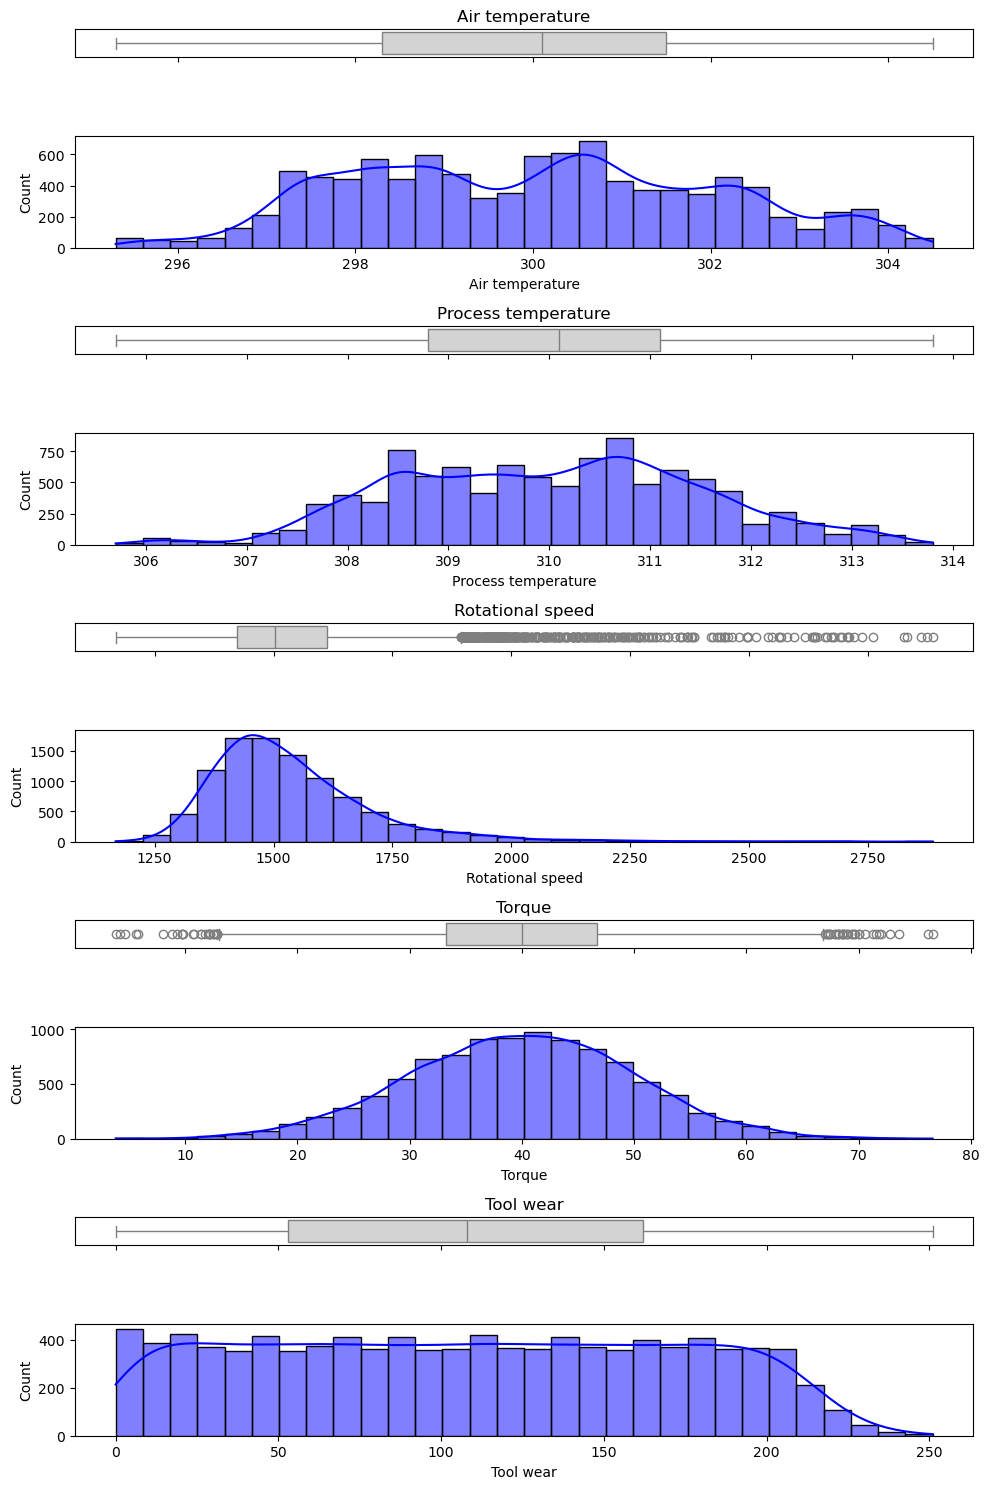

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = df_pre[features].select_dtypes(include=["number"]).columns.tolist()

n = len(num_features)
fig = plt.figure(figsize=(10, 3*n))

gs = fig.add_gridspec(nrows=2*n, ncols=1, height_ratios=[1,4]*n)

for i, col in enumerate(num_features):
    ax_box = fig.add_subplot(gs[2*i, 0])
    ax_hist = fig.add_subplot(gs[2*i+1, 0], sharex=ax_box)

    sns.boxplot(x=df_pre[col], ax=ax_box, color="lightgray")
    sns.histplot(df_pre[col], bins=30, ax=ax_hist,kde=True, color="blue")

    ax_box.set_title(col)
    ax_box.set_yticks([])
    ax_box.set_xlabel("")
    plt.setp(ax_box.get_xticklabels(), visible=False)

plt.tight_layout()
plt.show()


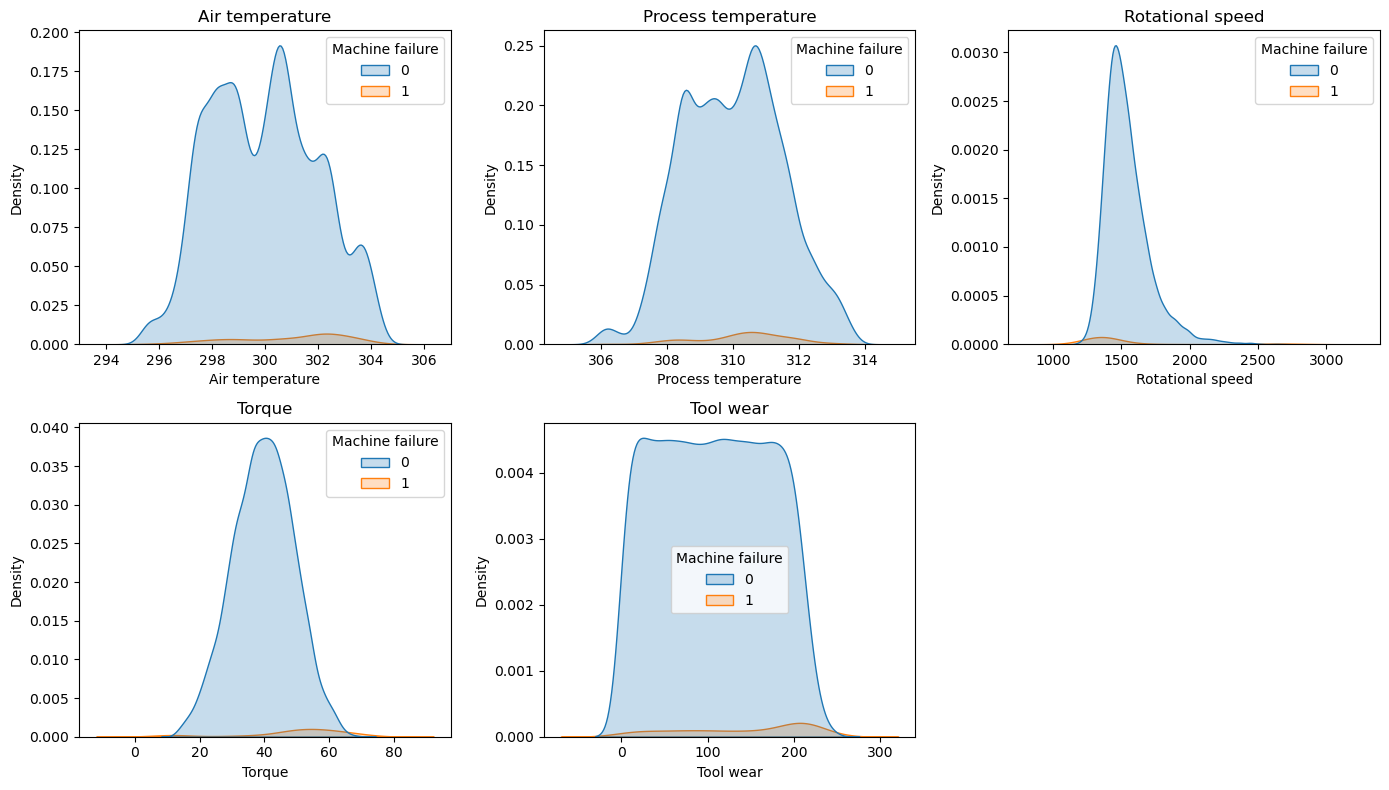

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = df_pre[features].select_dtypes(include=["number"]).columns
n = len(num_features)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows))
axes = axes.flatten()

for ax, col in zip(axes, num_features):
    sns.kdeplot(data=df_pre, x=col, hue="Machine failure", fill=True, common_norm=True, ax=ax)
    ax.set_title(col)

for ax in axes[n:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


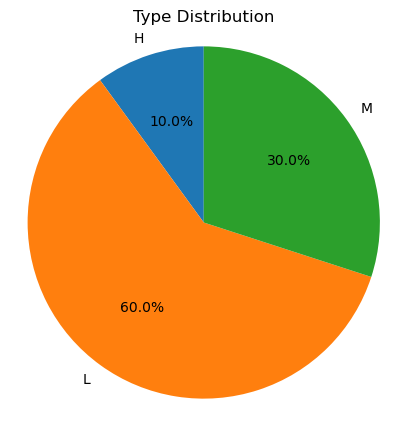

In [32]:
import matplotlib.pyplot as plt

counts = df_pre["Type"].value_counts().sort_index()

plt.figure(figsize=(5,5))
plt.pie(
    counts,
    labels=counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Type Distribution")
plt.axis("equal")
plt.show()


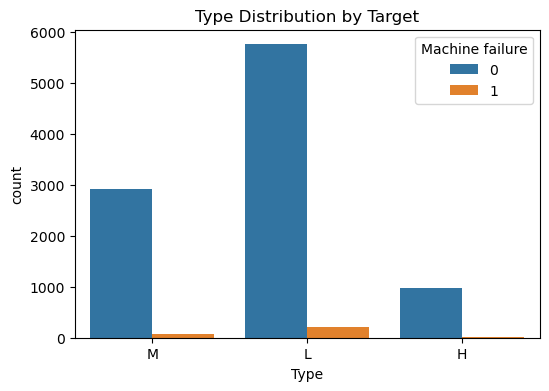

In [33]:

import seaborn as sns
import matplotlib.pyplot as plt

target_col = "Machine failure"  # adjust if needed

plt.figure(figsize=(6,4))
sns.countplot(data=df_pre, x="Type", hue=target_col)
plt.title("Type Distribution by Target")
plt.show()


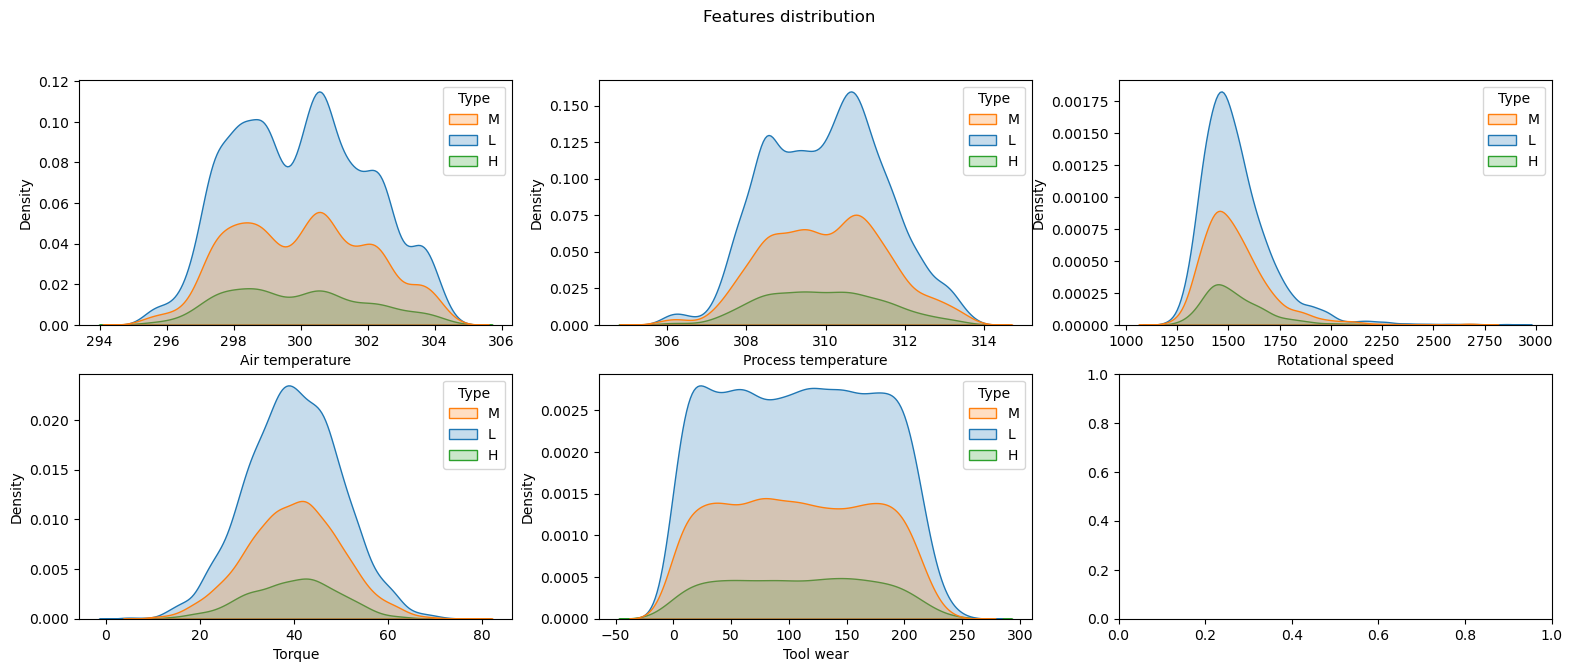

In [34]:

num_features = df_pre[features].select_dtypes(include=["number"]).columns
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(19,7))
fig.suptitle('Features distribution ')
custom_palette = {'L':'tab:blue', 'M':'tab:orange', 'H':'tab:green'}
for j, feature in enumerate(num_features):
    sns.kdeplot(ax=axs[j//3, j-3*(j//3)], data=df_pre, x=feature,
              hue='Type', fill=True, palette=custom_palette)
plt.show()

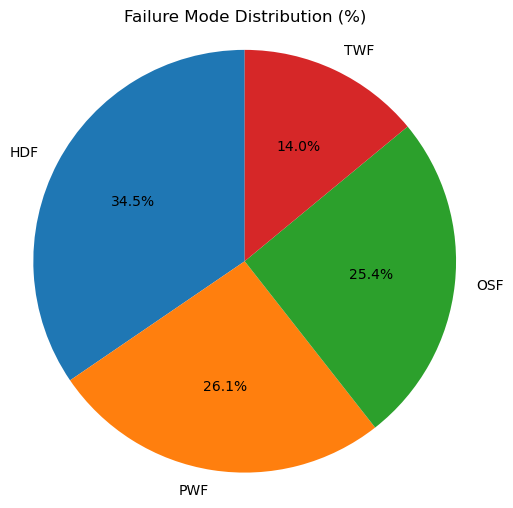

In [35]:
import matplotlib.pyplot as plt

counts = df.loc[df["failure type"] != "None", "failure type"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Failure Mode Distribution (%)")
plt.axis("equal")
plt.show()


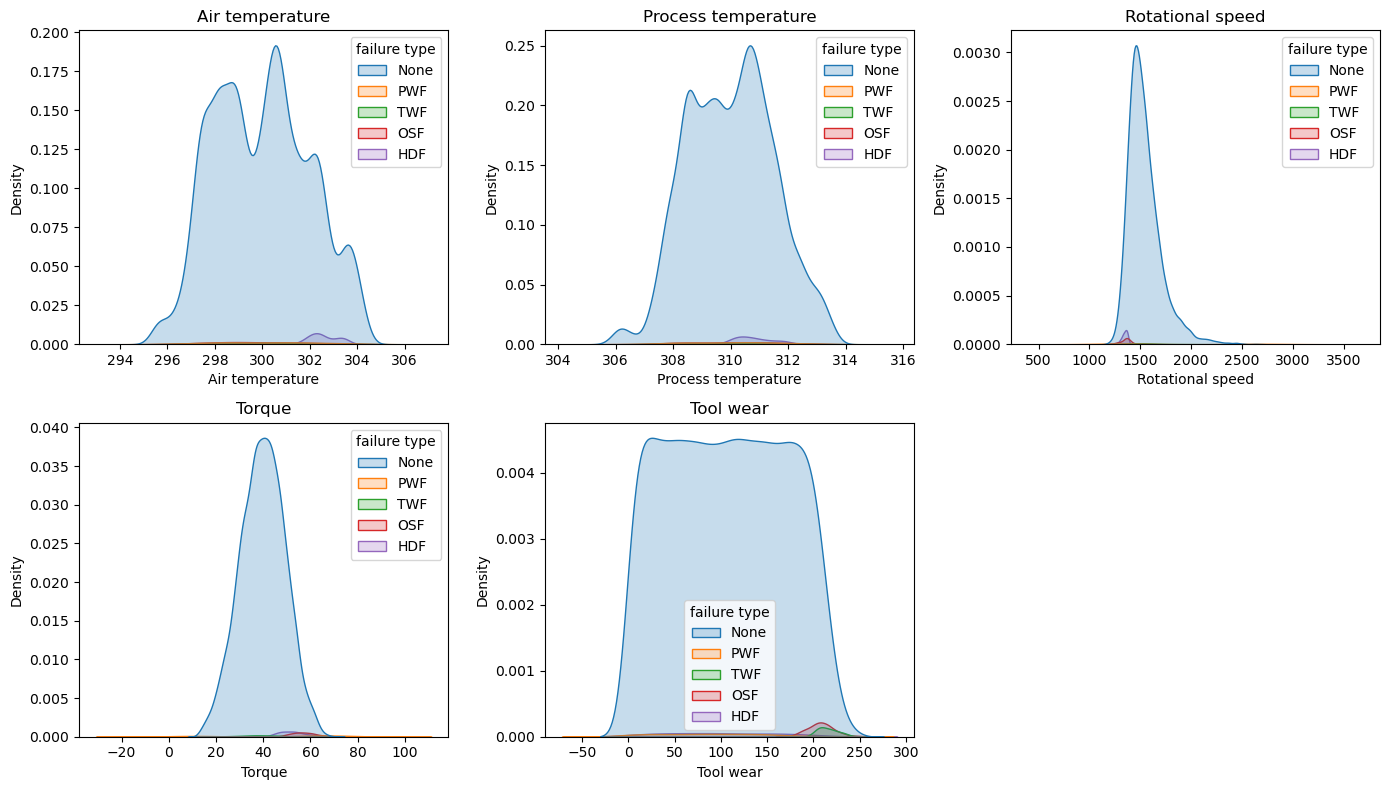

In [36]:


num_features = df_pre[features].select_dtypes(include=["number"]).columns
n = len(num_features)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows))
axes = axes.flatten()

for ax, col in zip(axes, num_features):
    sns.kdeplot(data=df_pre, x=col, hue="failure type", fill=True, common_norm=True, ax=ax)
    ax.set_title(col)

for ax in axes[n:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


# Oversample dataset

In [37]:
#%pip install --upgrade imbalanced-learn scikit-learn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC

# Count of "None" (no failure) samples - this will be 80% of final dataset
n_working = df_pre['failure type'].value_counts()['None']
desired_length = round(n_working / 0.8)
spc = round((desired_length - n_working) / 4)  # samples per class (4 failure types)

# Define target distribution for each class
balance_strategy = {
    'None': n_working,
    'OSF': spc,   # Overstrain Failure
    'HDF': spc,   # Heat Dissipation Failure
    'PWF': spc,   # Power Failure
    'TWF': spc    # Tool Wear Failure
}

# Prepare features and target
X = df_pre.drop(columns=['Machine failure', 'failure type', 'TWF', 'HDF', 'PWF', 'OSF'])
y = df_pre['failure type']

# Find index of categorical column ('Type')
cat_idx = [X.columns.get_loc('Type')]

# Apply SMOTENC
sm = SMOTENC(categorical_features=cat_idx, sampling_strategy=balance_strategy, random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Create resampled DataFrame
df_resampled = X_res.copy()
df_resampled['failure type'] = y_res
df_resampled['Machine failure'] = (y_res != 'None').astype(int)

print(f"Original shape: {df_pre.shape}")
print(f"Resampled shape: {df_resampled.shape}")
print(f"\nClass distribution after resampling:")
print(df_resampled['failure type'].value_counts())

Original shape: (9950, 12)
Resampled shape: (12055, 8)

Class distribution after resampling:
failure type
None    9643
PWF      603
TWF      603
OSF      603
HDF      603
Name: count, dtype: int64


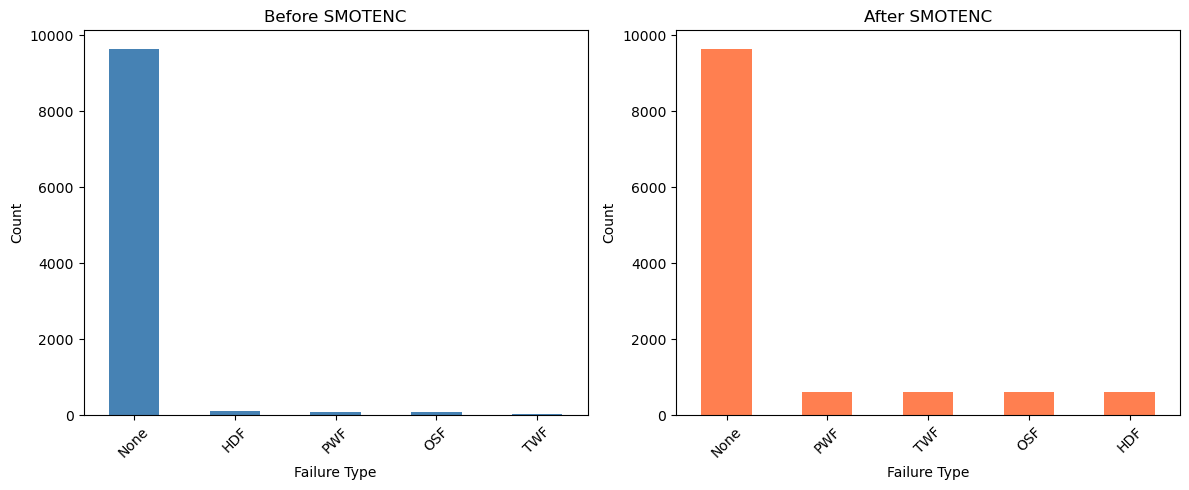

In [38]:
# Visualize the resampled class distribution
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before resampling
df_pre['failure type'].value_counts().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Before SMOTENC')
axes[0].set_xlabel('Failure Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# After resampling
df_resampled['failure type'].value_counts().plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('After SMOTENC')
axes[1].set_xlabel('Failure Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [39]:
df_resampled.head()

Type  Air temperature  Process temperature  Rotational speed  Torque  \
0    M            298.1                308.6              1551    42.8   
1    L            298.2                308.7              1408    46.3   
2    L            298.1                308.5              1498    49.4   
3    L            298.2                308.6              1433    39.5   
4    L            298.2                308.7              1408    40.0   

   Tool wear failure type  Machine failure  
0          0         None                0  
1          3         None                0  
2          5         None                0  
3          7         None                0  
4          9         None                0

In [40]:
# Display count for each failure type
print("Failure Type Distribution:")
print("-" * 30)
print(df_resampled['failure type'].value_counts())
print(f"\nTotal rows: {len(df_resampled)}")

print("\n" + "=" * 30)

# Display count for Machine failure (binary)
print("\nMachine Failure Distribution:")
print("-" * 30)
print(df_resampled['Machine failure'].value_counts().rename({0: 'No Failure (0)', 1: 'Failure (1)'}))

Failure Type Distribution:
------------------------------
failure type
None    9643
PWF      603
TWF      603
OSF      603
HDF      603
Name: count, dtype: int64

Total rows: 12055


Machine Failure Distribution:
------------------------------
Machine failure
No Failure (0)    9643
Failure (1)       2412
Name: count, dtype: int64


In [41]:
# Detailed distribution with percentages
print("=" * 50)
print("FAILURE TYPE DISTRIBUTION")
print("=" * 50)
counts = df_resampled['failure type'].value_counts()
for label, count in counts.items():
    pct = count / len(df_resampled) * 100
    print(f"{label:20s}: {count:5d} rows ({pct:5.2f}%)")

print("\n" + "=" * 50)
print("MACHINE FAILURE DISTRIBUTION (Binary)")
print("=" * 50)
counts_binary = df_resampled['Machine failure'].value_counts()
labels = {0: 'No Failure', 1: 'Failure'}
for label, count in counts_binary.items():
    pct = count / len(df_resampled) * 100
    print(f"{labels[label]:20s}: {count:5d} rows ({pct:5.2f}%)")

FAILURE TYPE DISTRIBUTION
None                :  9643 rows (79.99%)
PWF                 :   603 rows ( 5.00%)
TWF                 :   603 rows ( 5.00%)
OSF                 :   603 rows ( 5.00%)
HDF                 :   603 rows ( 5.00%)

MACHINE FAILURE DISTRIBUTION (Binary)
No Failure          :  9643 rows (79.99%)
Failure             :  2412 rows (20.01%)


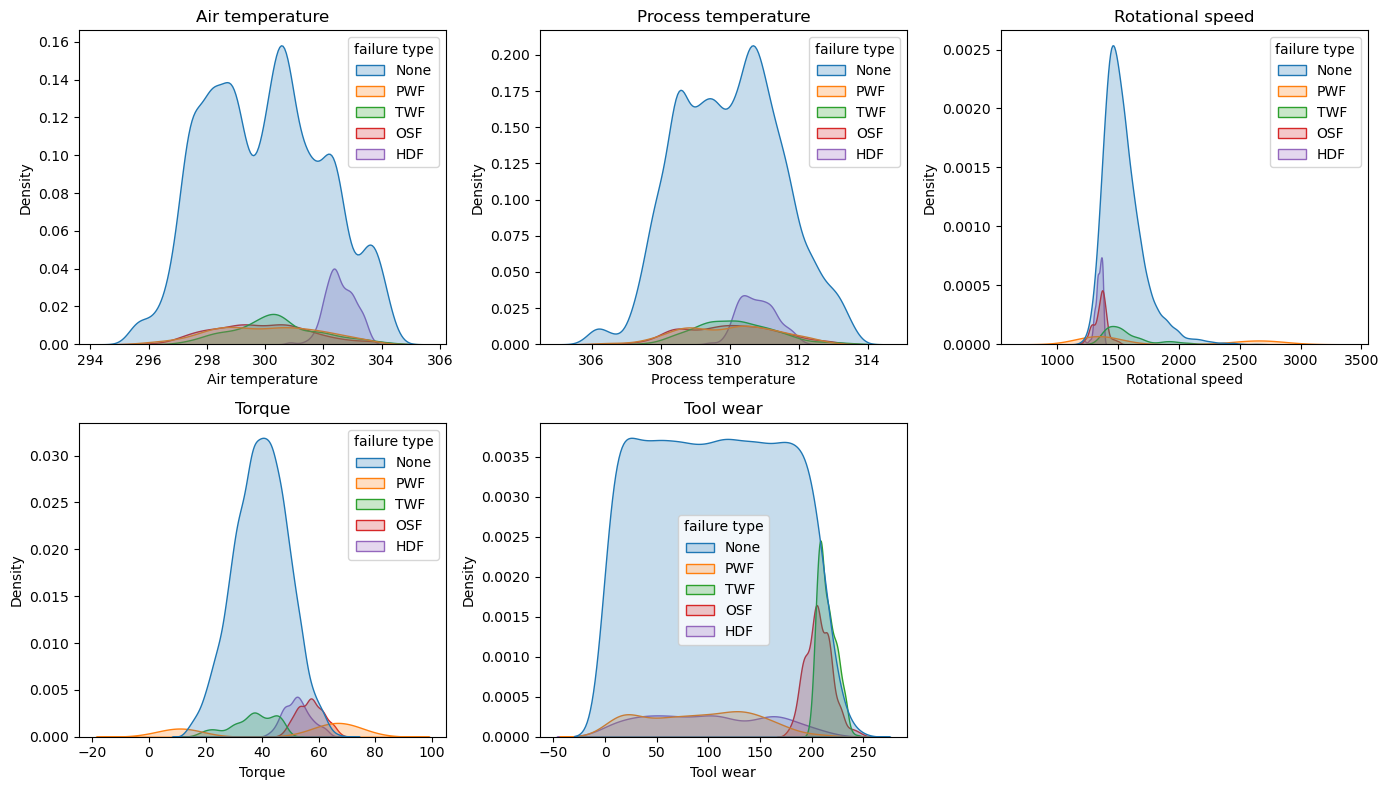

In [42]:
num_features = df_resampled[features].select_dtypes(include=["number"]).columns
n = len(num_features)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows))
axes = axes.flatten()

for ax, col in zip(axes, num_features):
    sns.kdeplot(data=df_resampled, x=col, hue="failure type", fill=True, common_norm=True, ax=ax)
    ax.set_title(col)

for ax in axes[n:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


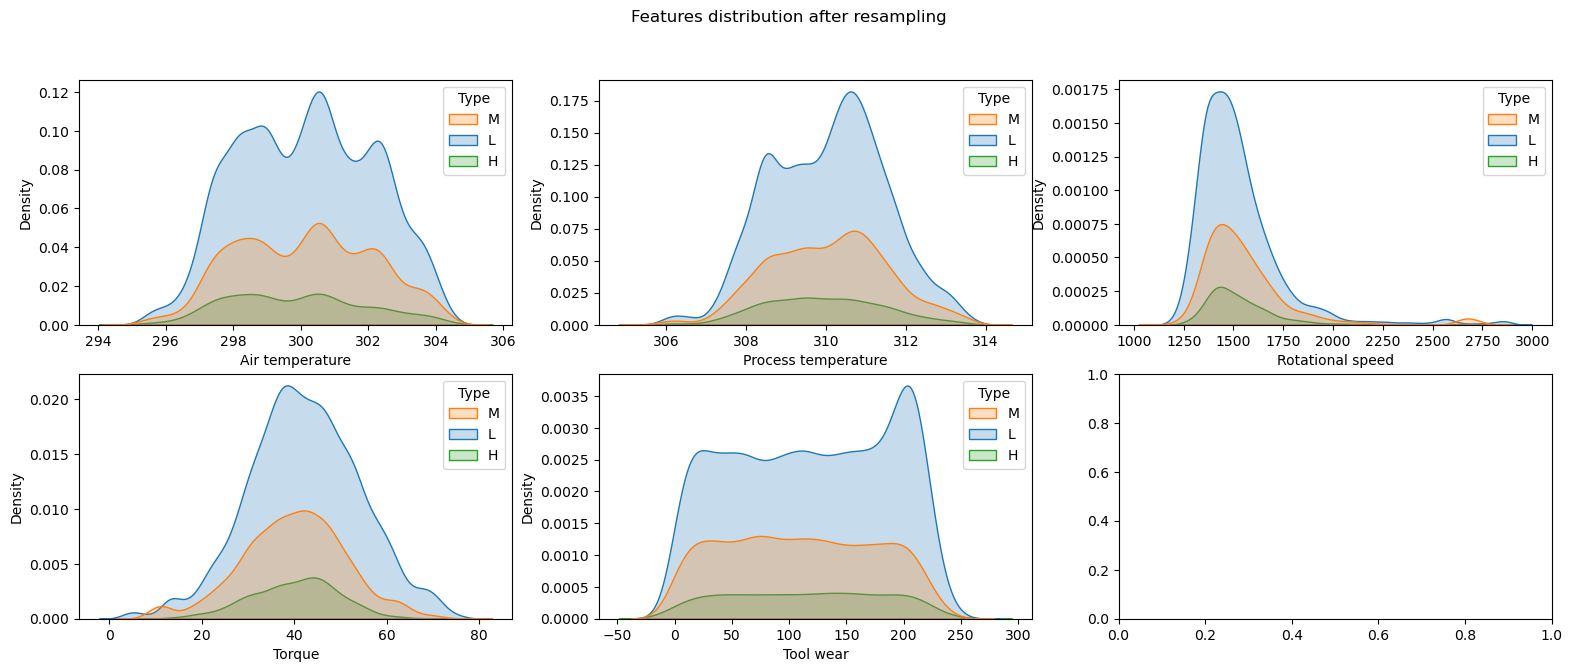

In [43]:

num_features = df_resampled[features].select_dtypes(include=["number"]).columns
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(19,7))
fig.suptitle('Features distribution after resampling ')
custom_palette = {'L':'tab:blue', 'M':'tab:orange', 'H':'tab:green'}
for j, feature in enumerate(num_features):
    sns.kdeplot(ax=axs[j//3, j-3*(j//3)], data=df_resampled, x=feature,
              hue='Type', fill=True, palette=custom_palette)
plt.show()

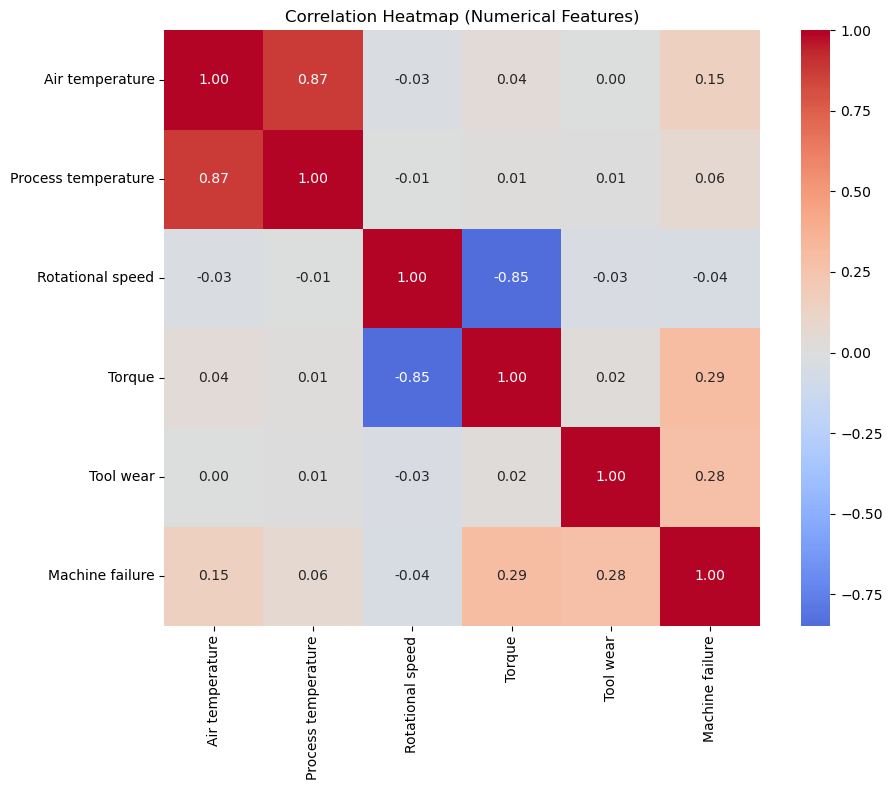

In [44]:



num_df = df_resampled.select_dtypes(include=["number"]).copy()
corr = num_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()


# PCA

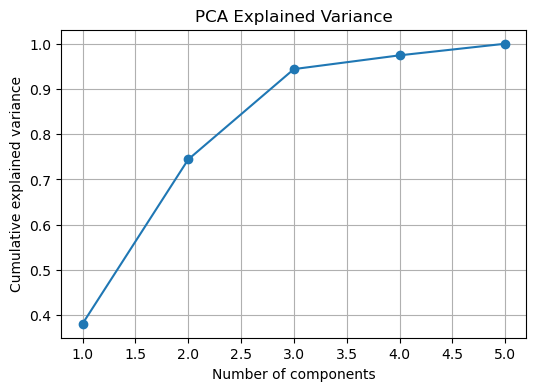

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# numeric features only (drop targets/labels)
X = df_resampled.select_dtypes(include=["number"]).drop(columns=["Machine failure"], errors="ignore")

# scale
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# explained variance plot
plt.figure(figsize=(6,4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()


In [54]:


# numeric features only (drop target)
X = df_resampled.select_dtypes(include=["number"]).drop(columns=["Machine failure"], errors="ignore")

# scale then fit PCA with 3 components
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=3, random_state=0)
X_pca3 = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", pca.explained_variance_ratio_.sum())


Explained variance ratio: [0.38134169 0.36295879 0.19962551]
Cumulative explained variance: 0.943925985898126


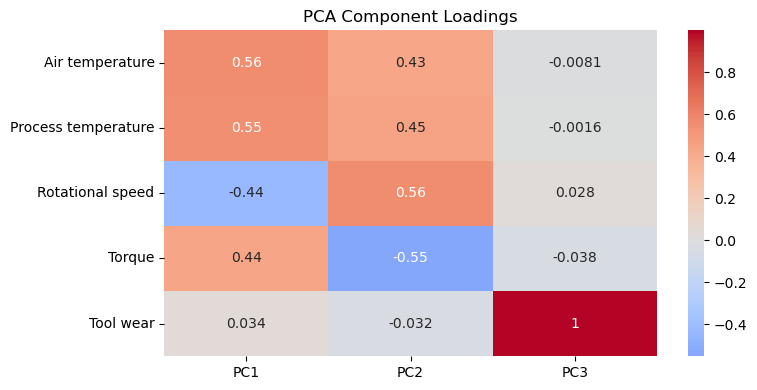

PC1       PC2       PC3
Air temperature      0.559720  0.431781 -0.008106
Process temperature  0.549426  0.445533 -0.001560
Torque               0.439612 -0.552587 -0.037947
Rotational speed    -0.436355  0.555576  0.028027
Tool wear            0.034345 -0.032382  0.998853

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# feature loadings (what each PC is made of)
loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)]
)

plt.figure(figsize=(8, max(4, 0.35*len(loadings))))
sns.heatmap(loadings, cmap="coolwarm", center=0,annot=True)
plt.title("PCA Component Loadings")
plt.tight_layout()
plt.show()

loadings.sort_values("PC1", key=lambda s: s.abs(), ascending=False).head(10)


In [56]:

pca_names = [
    "Thermal_Stress_Index",  # PC1: High Temps + High Torque
    "Speed_vs_Force",        # PC2: High Speed vs High Torque
    "Tool_Health_Index"      # PC3: Tool Wear
]

# Create a DataFrame with the named components
df_pca_named = pd.DataFrame(
    X_pca3, 
    columns=pca_names
)

# Add the target variable back for visualization
df_pca_final = pd.concat([
    df_pca_named, 
    df_resampled['failure type'].reset_index(drop=True)
], axis=1)

df_pca_final.head()

Thermal_Stress_Index  Speed_vs_Force  Tool_Health_Index failure type
0             -1.156458       -0.861922          -1.716813         None
1             -0.682389       -1.325399          -1.701703         None
2             -0.842685       -1.336241          -1.670272         None
3             -1.021740       -0.976479          -1.617009         None
4             -0.915697       -1.031170          -1.592083         None

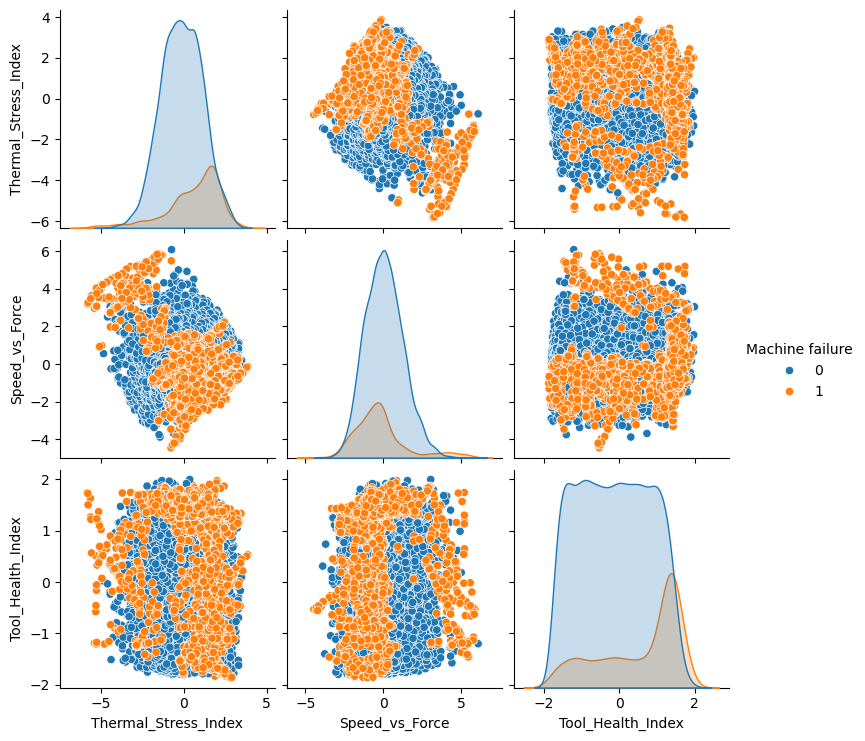

In [57]:

df_plot = df_pca_final.join(df_resampled["Machine failure"])
sns.pairplot(
	df_plot,
	vars=["Thermal_Stress_Index", "Speed_vs_Force", "Tool_Health_Index"],
	hue="Machine failure",
	corner=False
)
plt.show()

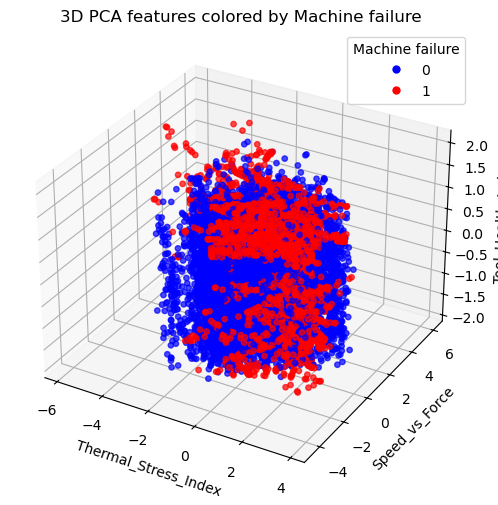

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection="3d")

y = df_resampled["Machine failure"].to_numpy()

colors = np.where(y == 1, "red", "blue")

ax.scatter(
    df_pca_final["Thermal_Stress_Index"],
    df_pca_final["Speed_vs_Force"],
    df_pca_final["Tool_Health_Index"],
    c=colors, s=15, alpha=0.7
)

ax.set_xlabel("Thermal_Stress_Index")
ax.set_ylabel("Speed_vs_Force")
ax.set_zlabel("Tool_Health_Index")
ax.set_title("3D PCA features colored by Machine failure")

legend_elems = [
    Line2D([0], [0], marker="o", color="w", label="0", markerfacecolor="blue", markersize=7),
    Line2D([0], [0], marker="o", color="w", label="1", markerfacecolor="red", markersize=7),
]
ax.legend(handles=legend_elems, title="Machine failure")

plt.show()


# Binary classification

In [110]:
df_binary=df_resampled.copy()
df_binary.head()    

Type  Air temperature  Process temperature  Rotational speed  Torque  \
0    M            298.1                308.6              1551    42.8   
1    L            298.2                308.7              1408    46.3   
2    L            298.1                308.5              1498    49.4   
3    L            298.2                308.6              1433    39.5   
4    L            298.2                308.7              1408    40.0   

   Tool wear failure type  Machine failure  
0          0         None                0  
1          3         None                0  
2          5         None                0  
3          7         None                0  
4          9         None                0

In [111]:
df_binary.drop(columns=['failure type'], inplace=True)

In [112]:
df_binary

Type  Air temperature  Process temperature  Rotational speed     Torque  \
0        M       298.100000           308.600000              1551  42.800000   
1        L       298.200000           308.700000              1408  46.300000   
2        L       298.100000           308.500000              1498  49.400000   
3        L       298.200000           308.600000              1433  39.500000   
4        L       298.200000           308.700000              1408  40.000000   
...    ...              ...                  ...               ...        ...   
12050    L       300.183086           310.902076              1528  38.530266   
12051    L       304.232941           313.350695              1507  36.670591   
12052    L       299.550889           309.384165              1851  23.841997   
12053    L       300.858312           311.824711              1523  38.529332   
12054    L       299.678729           310.300287              1519  36.079112   

       Tool wear  Machine failure  
0              0                0  
1              3                0  
2              5                0  
3              7                0  
4              9                0  
...          ...              ...  
12050        211                1  
12051        209                1  
12052        225                1  
12053        214                1  
12054        212                1  

[12055 rows x 7 columns]

In [113]:
# map Type (L/M/H) to numeric labels
type_map = {"L": 0, "M": 1, "H": 2}
df_binary["Type_label"] = df_binary["Type"].map(type_map)



In [114]:
df_binary.drop(columns=['Type'], inplace=True)
df_binary

Air temperature  Process temperature  Rotational speed     Torque  \
0           298.100000           308.600000              1551  42.800000   
1           298.200000           308.700000              1408  46.300000   
2           298.100000           308.500000              1498  49.400000   
3           298.200000           308.600000              1433  39.500000   
4           298.200000           308.700000              1408  40.000000   
...                ...                  ...               ...        ...   
12050       300.183086           310.902076              1528  38.530266   
12051       304.232941           313.350695              1507  36.670591   
12052       299.550889           309.384165              1851  23.841997   
12053       300.858312           311.824711              1523  38.529332   
12054       299.678729           310.300287              1519  36.079112   

       Tool wear  Machine failure  Type_label  
0              0                0           1  
1              3                0           0  
2              5                0           0  
3              7                0           0  
4              9                0           0  
...          ...              ...         ...  
12050        211                1           0  
12051        209                1           0  
12052        225                1           0  
12053        214                1           0  
12054        212                1           0  

[12055 rows x 7 columns]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1929
           1       0.94      0.97      0.95       482

    accuracy                           0.98      2411
   macro avg       0.97      0.98      0.97      2411
weighted avg       0.98      0.98      0.98      2411



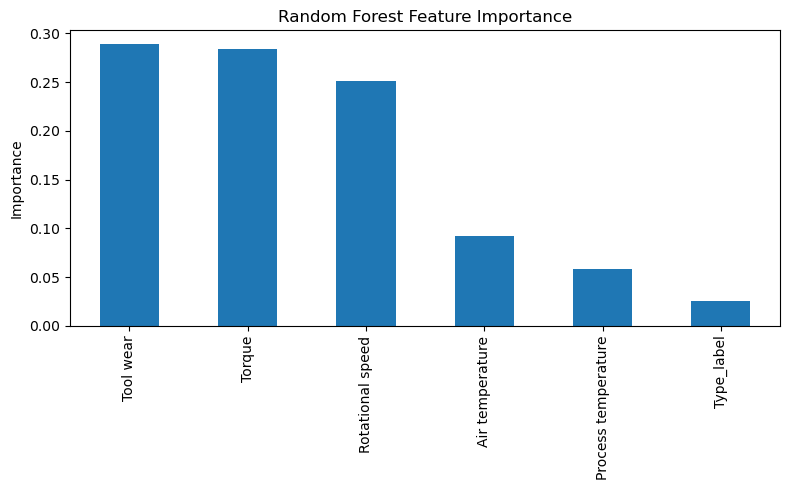

Tool wear              0.288787
Torque                 0.284435
Rotational speed       0.251491
Air temperature        0.091829
Process temperature    0.058105
Type_label             0.025354
dtype: float64

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

target_col = "Machine failure"

X = df_binary.drop(columns=[target_col])

y = df_binary[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1, class_weight="balanced")
rf.fit(X_train, y_train)

print(classification_report(y_test, rf.predict(X_test)))

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
importances.plot(kind="bar")
plt.title("Random Forest Feature Importance")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

importances


In [116]:
import pandas as pd
from scipy.stats import chi2_contingency

# Chi-square test: Type vs target
ct = pd.crosstab(df_binary["Type_label"], df_binary["Machine failure"])
chi2, p, dof, expected = chi2_contingency(ct)

print("Contingency table:\n", ct)
print(f"chi2={chi2:.4f}, dof={dof}, p-value={p:.6g}")

expected_df = pd.DataFrame(expected, index=ct.index, columns=ct.columns)
expected_df


Contingency table:
 Machine failure     0     1
Type_label                 
0                5753  1919
1                2912   404
2                 978    89
chi2=337.6726, dof=2, p-value=4.73518e-74


Machine failure            0            1
Type_label                               
0                6136.963584  1535.036416
1                2652.524927   663.475073
2                 853.511489   213.488511

Mutual Information Scores:
Process temperature : 0.333387
Air temperature     : 0.327613
Torque              : 0.264620
Rotational speed    : 0.139329
Tool wear           : 0.081604
Type_label          : 0.013236


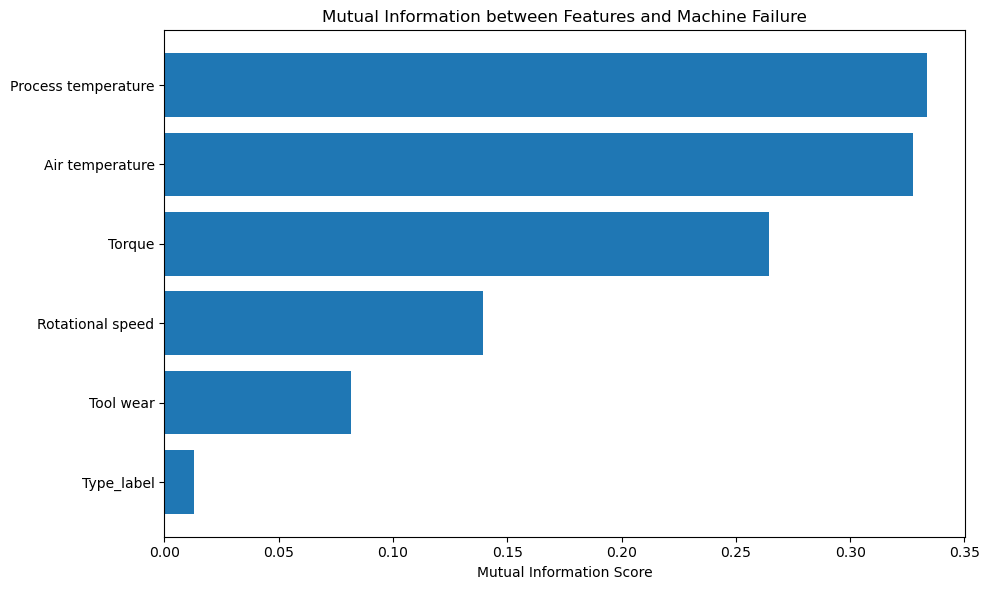

Feature  MI_Score
1  Process temperature  0.333387
0      Air temperature  0.327613
3               Torque  0.264620
2     Rotational speed  0.139329
4            Tool wear  0.081604
5           Type_label  0.013236

In [117]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Prepare features and target
X = df_binary.drop(columns=["Machine failure"])
y = df_binary["Machine failure"]

# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create a dataframe for better visualization
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print("Mutual Information Scores:")
print("=" * 40)
for idx, row in mi_df.iterrows():
    print(f"{row['Feature']:20s}: {row['MI_Score']:.6f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['MI_Score'])
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information between Features and Machine Failure')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

mi_df

In [118]:
df_binary.drop(columns=['Type_label'], inplace=True)

In [119]:
df_binary

Air temperature  Process temperature  Rotational speed     Torque  \
0           298.100000           308.600000              1551  42.800000   
1           298.200000           308.700000              1408  46.300000   
2           298.100000           308.500000              1498  49.400000   
3           298.200000           308.600000              1433  39.500000   
4           298.200000           308.700000              1408  40.000000   
...                ...                  ...               ...        ...   
12050       300.183086           310.902076              1528  38.530266   
12051       304.232941           313.350695              1507  36.670591   
12052       299.550889           309.384165              1851  23.841997   
12053       300.858312           311.824711              1523  38.529332   
12054       299.678729           310.300287              1519  36.079112   

       Tool wear  Machine failure  
0              0                0  
1              3                0  
2              5                0  
3              7                0  
4              9                0  
...          ...              ...  
12050        211                1  
12051        209                1  
12052        225                1  
12053        214                1  
12054        212                1  

[12055 rows x 6 columns]

In [120]:
import numpy as np
import pandas as pd
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

target_col = "Machine failure"

X = df_binary.drop(columns=[target_col])
y = df_binary[target_col]

num_cols = X.select_dtypes(include=["number"]).columns


preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        
    ]
)

pipe = Pipeline([
    ("preprocess", preprocess),
    ("clf", LogisticRegression(max_iter=3000, class_weight="balanced"))
])

space = {
    "C": hp.loguniform("C", np.log(1e-4), np.log(1e2)),
    "solver": hp.choice("solver", ["lbfgs", "liblinear", "saga"]),
    "penalty": hp.choice("penalty", ["l2"]),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(params):
    pipe.set_params(
        clf__C=float(params["C"]),
        clf__solver=params["solver"],
        clf__penalty=params["penalty"],
    )
    score = cross_val_score(pipe, X, y, cv=cv, scoring="f1").mean()
    return {"loss": -score, "status": STATUS_OK}

trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=40,
    trials=trials,
    rstate=np.random.default_rng(42)
)

# decode hyperopt choices
solvers = ["lbfgs", "liblinear", "saga"]
penalties = ["l2"]

best_params = {
    "clf__C": float(best["C"]),
    "clf__solver": solvers[best["solver"]],
    "clf__penalty": penalties[best["penalty"]],
}

print("Best params:", best_params)

# fit best pipeline and evaluate
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_pipe = pipe.set_params(**best_params)
best_pipe.fit(X_train, y_train)

y_pred = best_pipe.predict(X_test)
print(classification_report(y_test, y_pred))


100%|██████████| 40/40 [00:03<00:00, 12.56trial/s, best loss: -0.6261939562548363]
Best params: {'clf__C': 95.92311187127221, 'clf__solver': 'saga', 'clf__penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      1929
           1       0.50      0.83      0.62       482

    accuracy                           0.80      2411
   macro avg       0.72      0.81      0.74      2411
weighted avg       0.86      0.80      0.81      2411



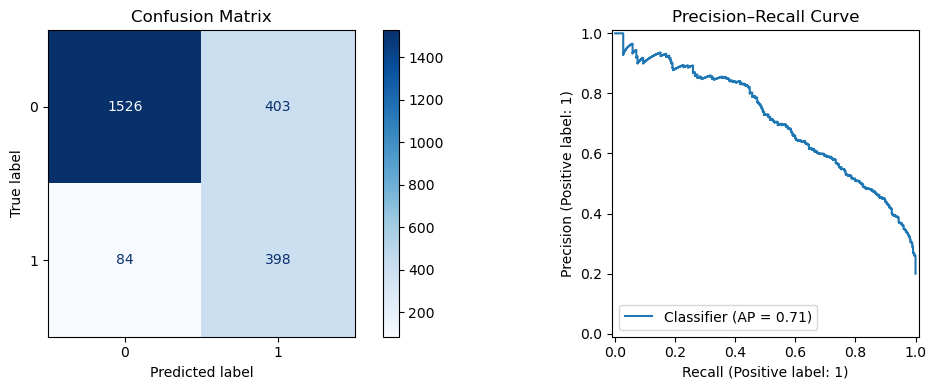

In [121]:
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# assumes you already trained: best_pipe (pipeline) and have X_test, y_test
y_pred = best_pipe.predict(X_test)

# probabilities for PR curve
y_score = best_pipe.predict_proba(X_test)[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axes[0], cmap="Blues")
axes[0].set_title("Confusion Matrix")

PrecisionRecallDisplay.from_predictions(y_test, y_score, ax=axes[1])
axes[1].set_title("Precision–Recall Curve")

plt.tight_layout()
plt.show()


In [122]:
y_test.value_counts()

Machine failure
0    1929
1     482
Name: count, dtype: int64

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
import pandas as pd

metrics_list = []

def add_metrics(model_name, y_true, y_pred, y_score=None):
    m = {
        "model": model_name,
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0),
    }
    if y_score is not None:
        m["roc_auc"] = roc_auc_score(y_true, y_score)
        m["pr_auc"] = average_precision_score(y_true, y_score)
    metrics_list.append(m)

# example:
y_pred = best_pipe.predict(X_test)
y_score = best_pipe.predict_proba(X_test)[:, 1]
add_metrics("LogReg", y_test, y_pred, y_score)

metrics_df = pd.DataFrame(metrics_list)
metrics_df


model  accuracy  precision    recall        f1   roc_auc    pr_auc
0  LogReg  0.798009   0.496879  0.825726  0.620421  0.896854  0.711714

In [124]:
import numpy as np
import pandas as pd
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

target_col = "Machine failure"

X = df_binary.drop(columns=[target_col])
y = df_binary[target_col]

# Get categorical and numerical columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns
num_cols = X.select_dtypes(include=["number"]).columns

# Create preprocessor
if len(cat_cols) > 0:
    preprocess = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols),
            ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
        ]
    )
else:
    preprocess = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols)
        ]
    )

# Create pipeline
pipe = Pipeline([
    ("preprocess", preprocess),
    ("clf", RandomForestClassifier(random_state=42, class_weight="balanced", n_jobs=-1))
])

# Define hyperparameter search space
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 500]),
    "max_depth": hp.choice("max_depth", [None, 10, 20, 30]),
    "min_samples_split": hp.choice("min_samples_split", [2, 5, 10]),
    "min_samples_leaf": hp.choice("min_samples_leaf", [1, 2, 4]),
    "max_features": hp.choice("max_features", ["sqrt", "log2", None])
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(params):
    pipe.set_params(
        clf__n_estimators=params["n_estimators"],
        clf__max_depth=params["max_depth"],
        clf__min_samples_split=params["min_samples_split"],
        clf__min_samples_leaf=params["min_samples_leaf"],
        clf__max_features=params["max_features"]
    )
    score = cross_val_score(pipe, X, y, cv=cv, scoring="f1").mean()
    return {"loss": -score, "status": STATUS_OK}

# Run hyperparameter optimization
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(42)
)

# Decode hyperopt choices
n_estimators_choices = [100, 200, 300, 500]
max_depth_choices = [None, 10, 20, 30]
min_samples_split_choices = [2, 5, 10]
min_samples_leaf_choices = [1, 2, 4]
max_features_choices = ["sqrt", "log2", None]

best_params = {
    "clf__n_estimators": n_estimators_choices[best["n_estimators"]],
    "clf__max_depth": max_depth_choices[best["max_depth"]],
    "clf__min_samples_split": min_samples_split_choices[best["min_samples_split"]],
    "clf__min_samples_leaf": min_samples_leaf_choices[best["min_samples_leaf"]],
    "clf__max_features": max_features_choices[best["max_features"]]
}

print("Best Random Forest params:", best_params)

# Train final model with best parameters
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_rf_pipe = pipe.set_params(**best_params)
best_rf_pipe.fit(X_train, y_train)

# Evaluate model
y_pred = best_rf_pipe.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))



 14%|█▍        | 7/50 [00:34<03:29,  4.87s/trial, best loss: -0.9578937489006254]


KeyboardInterrupt: 

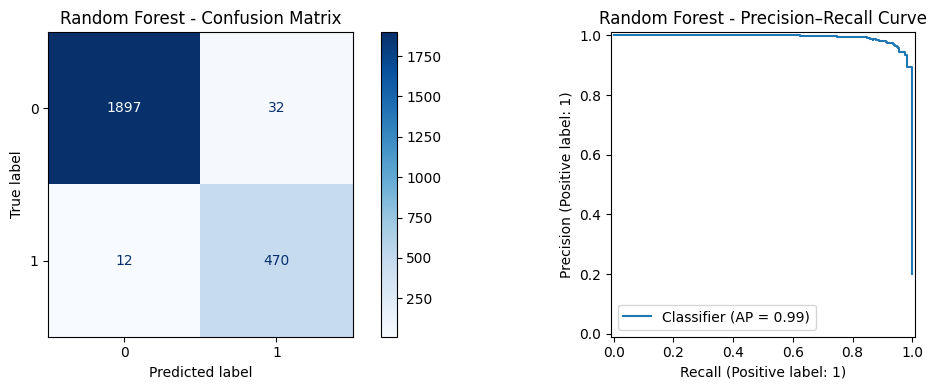


Model Performance Comparison:
          model  accuracy  precision  recall      f1  roc_auc  pr_auc
0        LogReg    0.7980     0.4969  0.8257  0.6204   0.8969  0.7117
1  RandomForest    0.9818     0.9363  0.9751  0.9553   0.9984  0.9933


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Get predictions and probabilities from the Random Forest model
y_pred_rf = best_rf_pipe.predict(X_test)
y_score_rf = best_rf_pipe.predict_proba(X_test)[:, 1]

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[0], cmap="Blues")
axes[0].set_title("Random Forest - Confusion Matrix")

# Precision-Recall Curve
PrecisionRecallDisplay.from_predictions(y_test, y_score_rf, ax=axes[1])
axes[1].set_title("Random Forest - Precision–Recall Curve")

plt.tight_layout()
plt.show()

# Also add Random Forest metrics to the metrics list
add_metrics("RandomForest", y_test, y_pred_rf, y_score_rf)

# Display updated metrics comparison
metrics_df = pd.DataFrame(metrics_list)
print("\nModel Performance Comparison:")
print(metrics_df.round(4))

100%|██████████| 50/50 [01:59<00:00,  2.38s/trial, best loss: -0.9596883081521359]
Best XGBoost params: {'clf__n_estimators': 500, 'clf__max_depth': 6, 'clf__learning_rate': np.float64(0.13028567536263833), 'clf__subsample': np.float64(0.9023822698756683), 'clf__colsample_bytree': np.float64(0.8472211893273287), 'clf__scale_pos_weight': 1}

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1929
           1       0.93      0.98      0.95       482

    accuracy                           0.98      2411
   macro avg       0.96      0.98      0.97      2411
weighted avg       0.98      0.98      0.98      2411



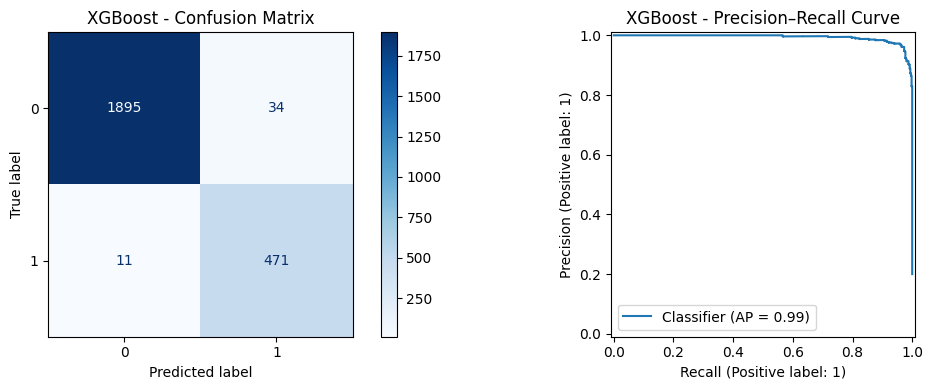


Model Performance Comparison:
          model  accuracy  precision  recall      f1  roc_auc  pr_auc
0        LogReg    0.7980     0.4969  0.8257  0.6204   0.8969  0.7117
1  RandomForest    0.9818     0.9363  0.9751  0.9553   0.9984  0.9933
2       XGBoost    0.9813     0.9327  0.9772  0.9544   0.9984  0.9933


In [ ]:
import numpy as np
import pandas as pd
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

target_col = "Machine failure"

X = df_binary.drop(columns=[target_col])
y = df_binary[target_col]

# Get categorical and numerical columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns
num_cols = X.select_dtypes(include=["number"]).columns

# Create preprocessor
if len(cat_cols) > 0:
    preprocess = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols),
            ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
        ]
    )
else:
    preprocess = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols)
        ]
    )

# Create pipeline
pipe = Pipeline([
    ("preprocess", preprocess),
    ("clf", XGBClassifier(random_state=42, eval_metric='logloss', enable_categorical=True))
])

# Define hyperparameter search space
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 500]),
    "max_depth": hp.choice("max_depth", [3, 6, 9, 12]),
    "learning_rate": hp.loguniform("learning_rate", np.log(0.01), np.log(0.3)),
    "subsample": hp.uniform("subsample", 0.6, 1.0),
    "colsample_bytree": hp.uniform("colsample_bytree", 0.6, 1.0),
    "scale_pos_weight": hp.choice("scale_pos_weight", [1, 2, 3, 4, 5])
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(params):
    pipe.set_params(
        clf__n_estimators=params["n_estimators"],
        clf__max_depth=params["max_depth"],
        clf__learning_rate=params["learning_rate"],
        clf__subsample=params["subsample"],
        clf__colsample_bytree=params["colsample_bytree"],
        clf__scale_pos_weight=params["scale_pos_weight"]
    )
    score = cross_val_score(pipe, X, y, cv=cv, scoring="f1").mean()
    return {"loss": -score, "status": STATUS_OK}

# Run hyperparameter optimization
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(42)
)

# Decode hyperopt choices
n_estimators_choices = [100, 200, 300, 500]
max_depth_choices = [3, 6, 9, 12]
scale_pos_weight_choices = [1, 2, 3, 4, 5]

best_params = {
    "clf__n_estimators": n_estimators_choices[best["n_estimators"]],
    "clf__max_depth": max_depth_choices[best["max_depth"]],
    "clf__learning_rate": best["learning_rate"],
    "clf__subsample": best["subsample"],
    "clf__colsample_bytree": best["colsample_bytree"],
    "clf__scale_pos_weight": scale_pos_weight_choices[best["scale_pos_weight"]]
}

print("Best XGBoost params:", best_params)

# Train final model with best parameters
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_xgb_pipe = pipe.set_params(**best_params)
best_xgb_pipe.fit(X_train, y_train)

# Evaluate model
y_pred_xgb = best_xgb_pipe.predict(X_test)
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Visualize results
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Get predictions and probabilities from XGBoost
y_score_xgb = best_xgb_pipe.predict_proba(X_test)[:, 1]

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, ax=axes[0], cmap="Blues")
axes[0].set_title("XGBoost - Confusion Matrix")

# Precision-Recall Curve
PrecisionRecallDisplay.from_predictions(y_test, y_score_xgb, ax=axes[1])
axes[1].set_title("XGBoost - Precision–Recall Curve")

plt.tight_layout()
plt.show()

# Add XGBoost metrics to comparison
add_metrics("XGBoost", y_test, y_pred_xgb, y_score_xgb)

# Display updated metrics comparison
metrics_df = pd.DataFrame(metrics_list)
print("\nModel Performance Comparison:")
print(metrics_df.round(4))

In [ ]:
# if you trained an XGBoost model named xgb_model
# option 1: native XGBoost format
xgb_model.save_model("xgboost_model.json")

# option 2: joblib (works for sklearn API)
import joblib
joblib.dump(xgb_model, "xgboost_model.pkl")


In [ ]:
# Save the XGBoost model using joblib (recommended for sklearn pipelines)
import joblib

# Save the entire pipeline (includes preprocessing + XGBoost model)
joblib.dump(best_xgb_pipe, "xgboost_pipeline_model.pkl")


['xgboost_pipeline_model.pkl']

# Multi classification 

In [45]:
# Force PyTorch to use NVIDIA GPU
import os
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader, TensorDataset
import warnings
warnings.filterwarnings("ignore")

# First, check which GPU has more memory (usually NVIDIA dedicated GPU)
if torch.cuda.is_available() and torch.cuda.device_count() > 1:
    print("Detecting GPUs...")
    max_memory = 0
    nvidia_gpu_idx = 0
    
    for i in range(torch.cuda.device_count()):
        mem = torch.cuda.get_device_properties(i).total_memory
        name = torch.cuda.get_device_name(i)
        print(f"GPU {i}: {name} - {mem / 1024**3:.2f} GB")
        
        # Select GPU with most memory OR contains "NVIDIA" in name
        if mem > max_memory or "NVIDIA" in name.upper():
            max_memory = mem
            nvidia_gpu_idx = i
    
    # Hide all GPUs except the NVIDIA one
    os.environ["CUDA_VISIBLE_DEVICES"] = str(nvidia_gpu_idx)
    print(f"\n✓ Selected GPU {nvidia_gpu_idx}: {torch.cuda.get_device_name(nvidia_gpu_idx)}")
    print(f"  Setting CUDA_VISIBLE_DEVICES={nvidia_gpu_idx}")
    print("  Please RESTART KERNEL and rerun from this cell for changes to take effect!\n")

In [46]:
df_resampled.head()

Type  Air temperature  Process temperature  Rotational speed  Torque  \
0    M            298.1                308.6              1551    42.8   
1    L            298.2                308.7              1408    46.3   
2    L            298.1                308.5              1498    49.4   
3    L            298.2                308.6              1433    39.5   
4    L            298.2                308.7              1408    40.0   

   Tool wear failure type  Machine failure  
0          0         None                0  
1          3         None                0  
2          5         None                0  
3          7         None                0  
4          9         None                0

In [47]:
df_multic = df_resampled.copy()
df_multic.drop(columns=['Machine failure','Type'], inplace=True)

In [48]:
df_multic.head()

Air temperature  Process temperature  Rotational speed  Torque  Tool wear  \
0            298.1                308.6              1551    42.8          0   
1            298.2                308.7              1408    46.3          3   
2            298.1                308.5              1498    49.4          5   
3            298.2                308.6              1433    39.5          7   
4            298.2                308.7              1408    40.0          9   

  failure type  
0         None  
1         None  
2         None  
3         None  
4         None

In [49]:
df_multic.info()

<class 'pandas.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Air temperature      12055 non-null  float64
 1   Process temperature  12055 non-null  float64
 2   Rotational speed     12055 non-null  int64  
 3   Torque               12055 non-null  float64
 4   Tool wear            12055 non-null  int64  
 5   failure type         12055 non-null  str    
dtypes: float64(3), int64(2), str(1)
memory usage: 609.9 KB


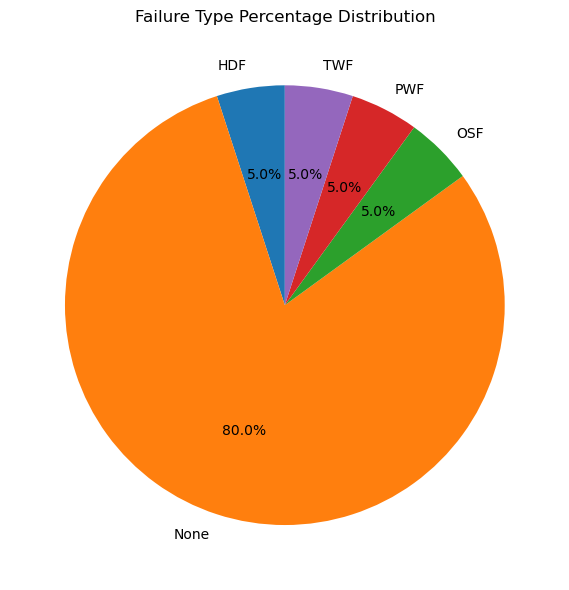

In [50]:


# Crosstab counts (same idea as value_counts, but via crosstab)
ct = pd.crosstab(index=df_multic["failure type"], columns="count")

# Convert to percentages
pct = (ct["count"] / ct["count"].sum()) * 100

# Pie chart
ax = pct.plot(kind="pie", autopct="%1.1f%%", startangle=90, ylabel="", figsize=(6, 6))
ax.set_title("Failure Type Percentage Distribution")
plt.tight_layout()
plt.show()


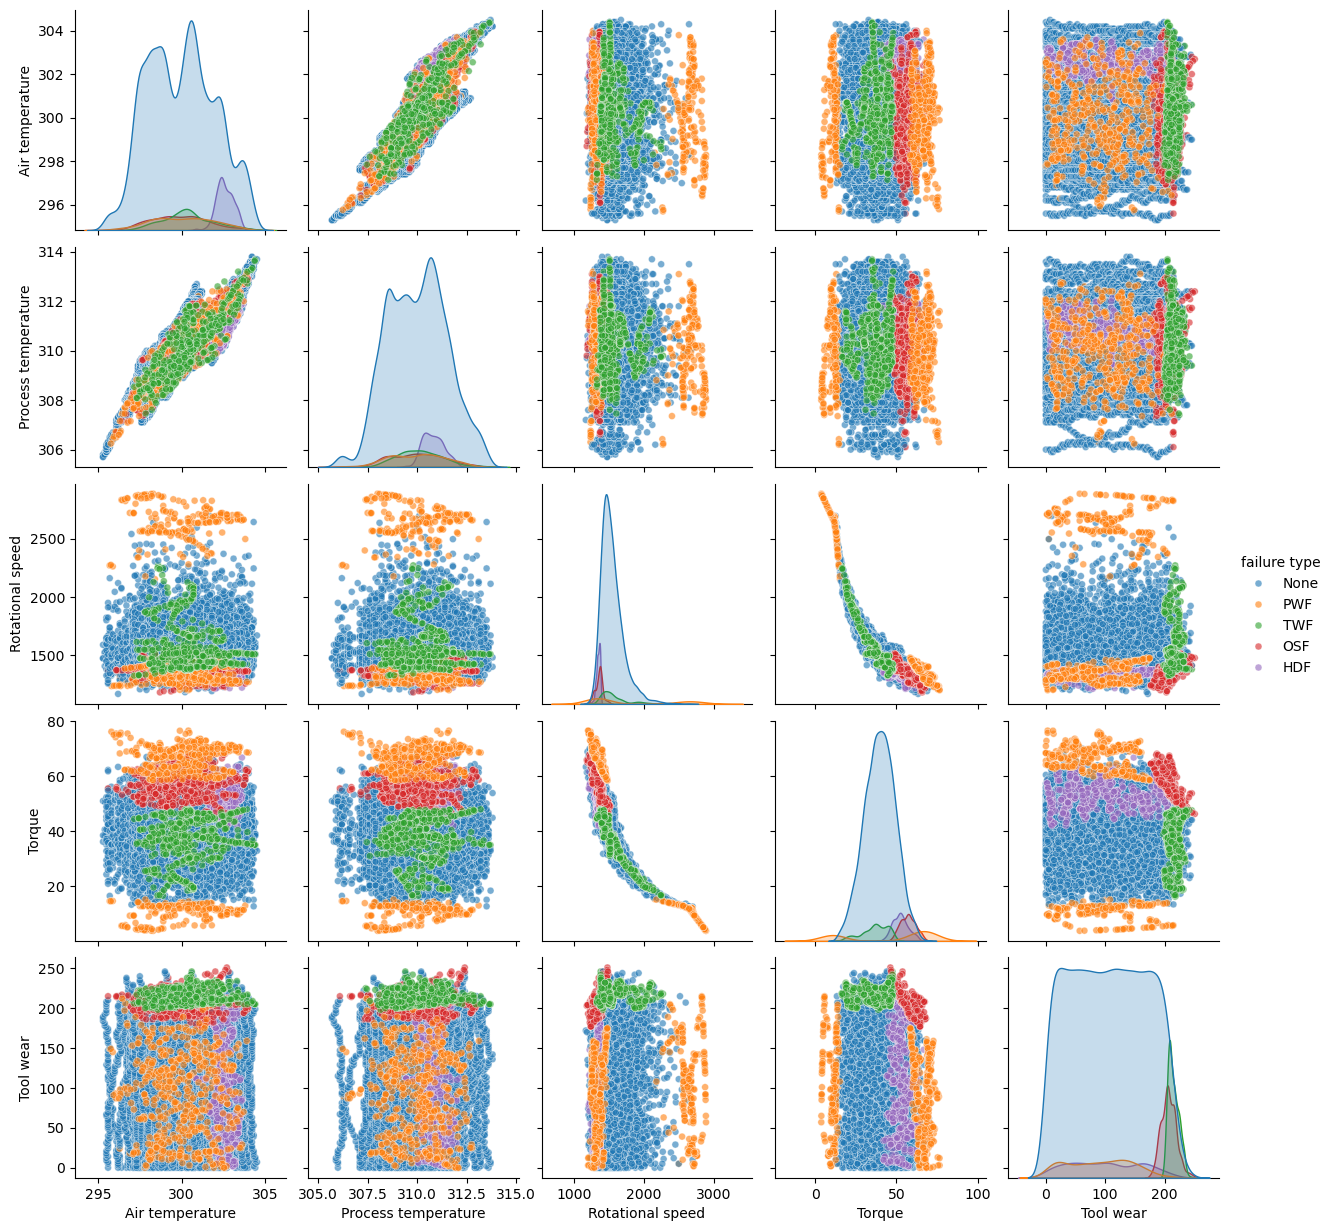

In [51]:


# pick numeric columns + target
num_cols = df_multic.select_dtypes(include="number").columns
plot_df = df_multic[list(num_cols) + ["failure type"]].dropna()

sns.pairplot(
    plot_df,
    hue="failure type",
    diag_kind="kde",        # or "hist"
               
    plot_kws={"alpha": 0.6, "s": 25}
)

plt.show()


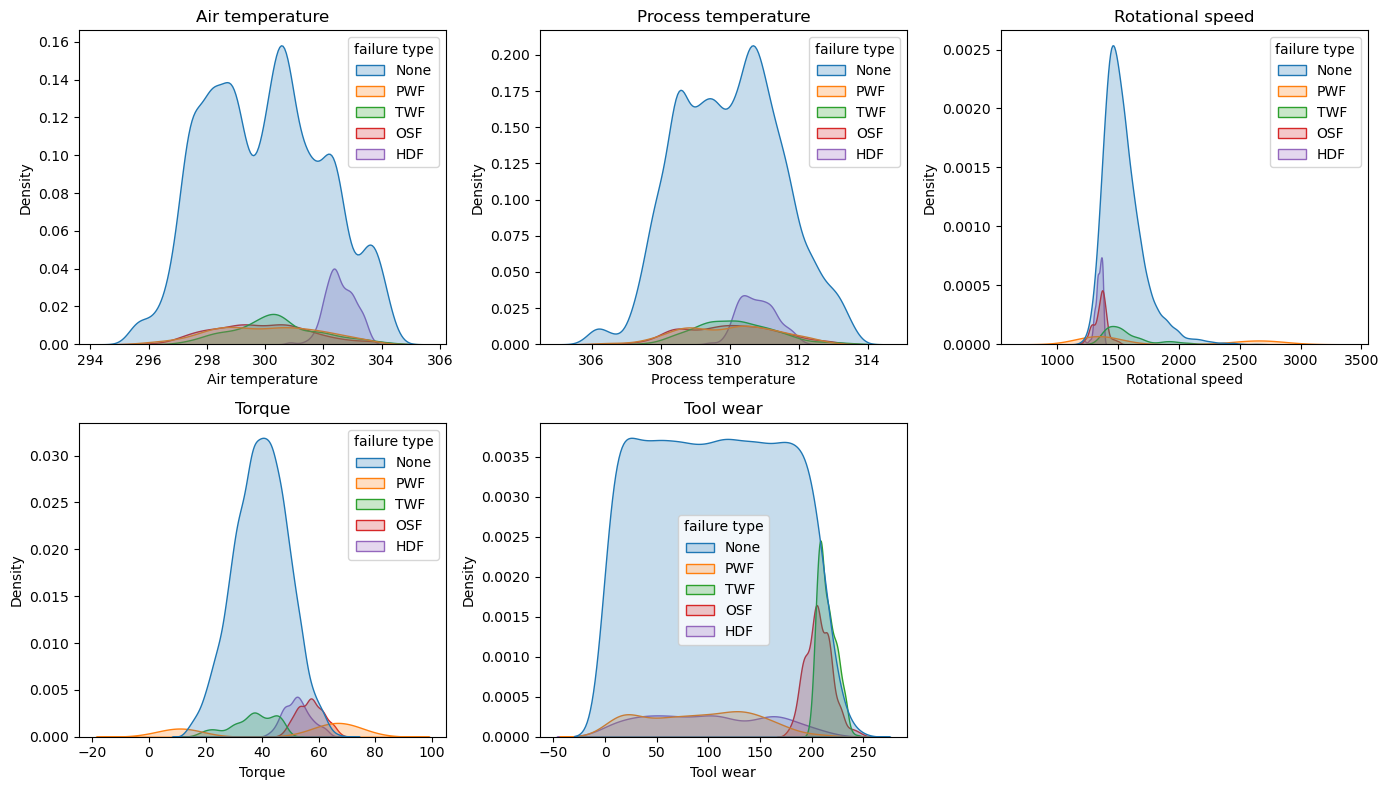

In [52]:
num_features = df_resampled[features].select_dtypes(include=["number"]).columns
n = len(num_features)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows))
axes = axes.flatten()

for ax, col in zip(axes, num_features):
    sns.kdeplot(data=df_resampled, x=col, hue="failure type", fill=True, common_norm=True, ax=ax)
    ax.set_title(col)

for ax in axes[n:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


In [53]:
df_multic

Air temperature  Process temperature  Rotational speed     Torque  \
0           298.100000           308.600000              1551  42.800000   
1           298.200000           308.700000              1408  46.300000   
2           298.100000           308.500000              1498  49.400000   
3           298.200000           308.600000              1433  39.500000   
4           298.200000           308.700000              1408  40.000000   
...                ...                  ...               ...        ...   
12050       300.183086           310.902076              1528  38.530266   
12051       304.232941           313.350695              1507  36.670591   
12052       299.550889           309.384165              1851  23.841997   
12053       300.858312           311.824711              1523  38.529332   
12054       299.678729           310.300287              1519  36.079112   

       Tool wear failure type  
0              0         None  
1              3         None  
2              5         None  
3              7         None  
4              9         None  
...          ...          ...  
12050        211          TWF  
12051        209          TWF  
12052        225          TWF  
12053        214          TWF  
12054        212          TWF  

[12055 rows x 6 columns]

In [54]:
# map failure type to numeric labels for multiclass classification
failure_type_map = { "None": 0, "OSF": 1, "HDF": 2, "PWF": 3, "TWF": 4 }
df_multic["failure_type_label"] = df_multic["failure type"].map(failure_type_map)

In [55]:
df_multic.drop(columns=['failure type'], inplace=True)

In [56]:
target_col = "failure_type_label"

X = df_multic.drop(columns=[target_col])

y = df_multic[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [57]:
y_train.value_counts()

failure_type_label
0    7714
2     483
4     483
3     482
1     482
Name: count, dtype: int64

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [59]:
# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float64))
        self.y = torch.from_numpy(y.to_numpy().astype(np.float64))
        self.len = self.X.shape[0]
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return self.len





In [60]:
batch_size = 64
# Instantiate training and test data
train_data = Data(X_train_scaled, y_train)
train_dl = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(X_test_scaled, y_test)
test_dl = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)  # FIXED: Changed train_data to test_data

for batch, (X, y) in enumerate(train_dl):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break

Batch: 1
X shape: torch.Size([64, 5])
y shape: torch.Size([64])


# Neural network implementation & model training 

In [71]:
import torch
from torch import nn
from torch import optim

In [72]:
input_dim = 5
output_dim = 5

# Improved model architecture for better performance
class PredicMaint(nn.Module):
    def __init__(self, input_dim,  output_dim):
        super().__init__()
        self.net = nn.Sequential(
            # First block - wider initial layer (256 neurons)
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            # Second block
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.25),

            # Third block
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),

            # Fourth block
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.15),

            # Output layer - NO Softmax (CrossEntropyLoss applies it internally)
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        return self.net(x)
        
        

model = PredicMaint(input_dim=5,output_dim=5)
model.eval()

PredicMaint(
  (net): Sequential(
    (0): Linear(in_features=5, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.25, inplace=False)
    (8): Linear(in_features=128, out_features=64, bias=True)
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=64, out_features=32, bias=True)
    (13): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.15, inplace=False)
    (16): Linear(in_features=32, out_features=5, bias=True)
  )
)

In [73]:
loss_fn = nn.CrossEntropyLoss()
# Add weight decay (L2 regularization) for better generalization
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Learning rate scheduler - reduce LR when validation loss plateaus
from torch.optim.lr_scheduler import ReduceLROnPlateau
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, verbose=True)


In [74]:
import torch

# Check available CUDA devices
print("="*60)
print("GPU DETECTION")
print("="*60)
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"Number of GPUs: {torch.cuda.device_count()}")
print()

# List all available GPUs with detailed info
if torch.cuda.is_available():
    for i in range(torch.cuda.device_count()):
        props = torch.cuda.get_device_properties(i)
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"  Total Memory: {props.total_memory / 1024**3:.2f} GB")
        print(f"  Compute Capability: {props.major}.{props.minor}")
        print(f"  Multi Processors: {props.multi_processor_count}")
        print()
    
    # Automatically select GPU with most memory (usually NVIDIA dedicated GPU)
    max_memory = 0
    best_gpu = 0
    
    for i in range(torch.cuda.device_count()):
        mem = torch.cuda.get_device_properties(i).total_memory
        if mem > max_memory:
            max_memory = mem
            best_gpu = i
    
    device = torch.device(f"cuda:{best_gpu}")
    
    print("="*60)
    print(f"✓ SELECTED GPU {best_gpu}: {torch.cuda.get_device_name(best_gpu)}")
    print(f"✓ Available Memory: {max_memory / 1024**3:.2f} GB")
    print("="*60)
    
else:
    device = torch.device("cpu")
    print("⚠ CUDA not available, using CPU")

# Move model to the selected device
model = model.to(device)

# Verify the model is on the correct device
print(f"\n✓ Model device: {next(model.parameters()).device}")
print(f"✓ Model on GPU: {next(model.parameters()).is_cuda}")

GPU DETECTION
CUDA available: True
Number of GPUs: 1

GPU 0: NVIDIA GeForce RTX 3050 6GB Laptop GPU
  Total Memory: 6.00 GB
  Compute Capability: 8.6
  Multi Processors: 20

✓ SELECTED GPU 0: NVIDIA GeForce RTX 3050 6GB Laptop GPU
✓ Available Memory: 6.00 GB

✓ Model device: cuda:0
✓ Model on GPU: True


In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Training loop with metrics tracking
torch.manual_seed(1)
num_epochs = 300  # Increased epochs with early stopping
log_epochs = 20 

# Lists to store metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Early stopping parameters
best_val_loss = float('inf')
patience = 30
patience_counter = 0

# Verify GPU before training
print("="*60)
print("STARTING TRAINING")
print("="*60)
print(f"Training on: {device}")
if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(device)}")
    print(f"Initial GPU Memory: {torch.cuda.memory_allocated(device) / 1024**2:.2f} MB\n")

for epoch in range(num_epochs):
    model.train()
    loss_hist_train = 0
    correct_train = 0
    total_train = 0
    
    for batch_idx, (x_batch, y_batch) in enumerate(train_dl):
        # Move data to device and convert to correct types
        x_batch = x_batch.float().to(device)
        y_batch = y_batch.long().to(device)
        
        # Verify GPU usage on first batch
        if epoch == 0 and batch_idx == 0:
            print("✓ First batch verification:")
            print(f"  Input tensor device: {x_batch.device}")
            print(f"  Target tensor device: {y_batch.device}")
            print(f"  Model device: {next(model.parameters()).device}")
            if torch.cuda.is_available():
                print(f"  GPU Memory in use: {torch.cuda.memory_allocated(device) / 1024**2:.2f} MB")
            print("="*60 + "\n")
        
        # Forward pass
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        loss_hist_train += loss.item()
        
        # Calculate training accuracy
        _, predicted = torch.max(pred.data, 1)
        total_train += y_batch.size(0)
        correct_train += (predicted == y_batch).sum().item()
    
    # Calculate epoch metrics
    avg_train_loss = loss_hist_train / len(train_dl)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    
    # Validation phase
    model.eval()
    loss_hist_val = 0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for x_batch, y_batch in test_dl:
            x_batch = x_batch.float().to(device)
            y_batch = y_batch.long().to(device)
            
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            
            loss_hist_val += loss.item()
            
            _, predicted = torch.max(pred.data, 1)
            total_val += y_batch.size(0)
            correct_val += (predicted == y_batch).sum().item()
    
    avg_val_loss = loss_hist_val / len(test_dl)
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)
    
    # Learning rate scheduling
    scheduler.step(avg_val_loss)
    
    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        # Save best model
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"\n Early stopping triggered at epoch {epoch}")
            print(f"Best validation loss: {best_val_loss:.4f}")
            break
    
    if epoch % log_epochs == 0:
        current_lr = optimizer.param_groups[0]['lr']
        print(f'Epoch {epoch}  Train Loss: {avg_train_loss:.4f}  Train Acc: {train_accuracy:.2f}%  Val Loss: {avg_val_loss:.4f}  Val Acc: {val_accuracy:.2f}%  LR: {current_lr:.6f}')

# Load best model
model.load_state_dict(torch.load('best_model.pth'))
print("\nTraining completed! Best model loaded.")

STARTING TRAINING
Training on: cuda:0
GPU Name: NVIDIA GeForce RTX 3050 6GB Laptop GPU
Initial GPU Memory: 16.49 MB

✓ First batch verification:
  Input tensor device: cuda:0
  Target tensor device: cuda:0
  Model device: cuda:0
  GPU Memory in use: 16.49 MB

Epoch 0  Train Loss: 0.6872  Train Acc: 81.78%  Val Loss: 0.3003  Val Acc: 93.16%  LR: 0.001000
Epoch 20  Train Loss: 0.1719  Train Acc: 92.51%  Val Loss: 0.1198  Val Acc: 94.98%  LR: 0.001000
Epoch 40  Train Loss: 0.1550  Train Acc: 93.27%  Val Loss: 0.1035  Val Acc: 95.89%  LR: 0.001000
Epoch 60  Train Loss: 0.1315  Train Acc: 94.38%  Val Loss: 0.0965  Val Acc: 95.98%  LR: 0.001000
Epoch 80  Train Loss: 0.1341  Train Acc: 94.38%  Val Loss: 0.0826  Val Acc: 96.89%  LR: 0.001000
Epoch 100  Train Loss: 0.1314  Train Acc: 94.43%  Val Loss: 0.0934  Val Acc: 96.35%  LR: 0.000500
Epoch 120  Train Loss: 0.1115  Train Acc: 95.25%  Val Loss: 0.0753  Val Acc: 97.35%  LR: 0.000500
Epoch 140  Train Loss: 0.1123  Train Acc: 95.38%  Val Loss: 

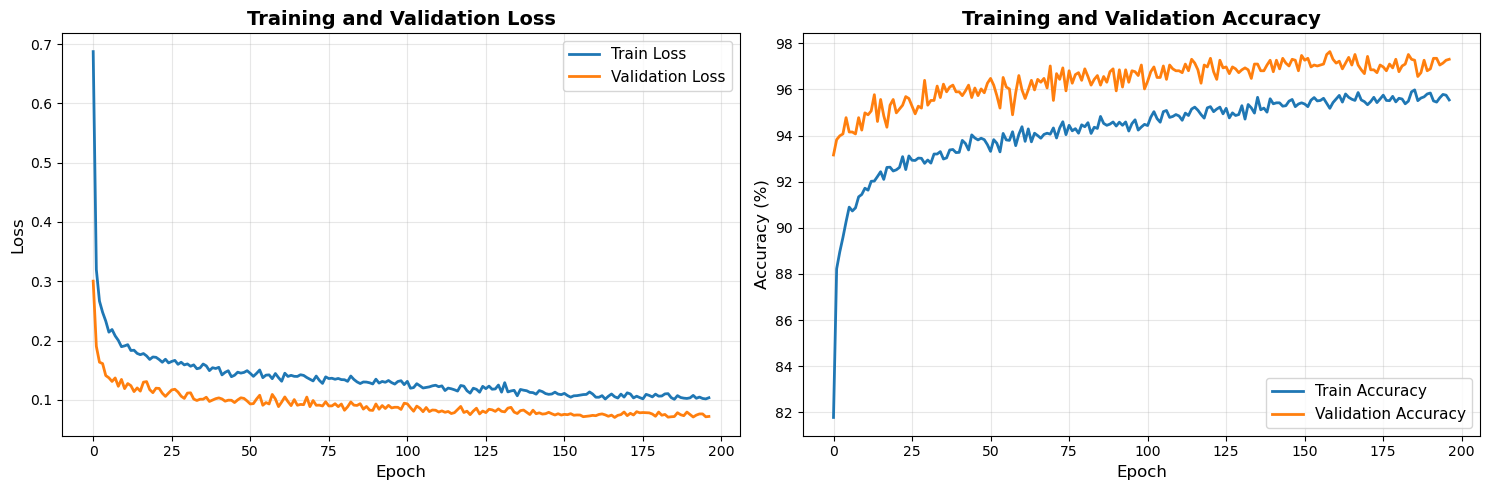

In [78]:
# Plot training and validation metrics
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Use actual number of epochs trained instead of num_epochs
actual_epochs = len(train_losses)

# Plot Loss
axes[0].plot(range(actual_epochs), train_losses, label='Train Loss', linewidth=2)
axes[0].plot(range(actual_epochs), val_losses, label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot Accuracy
axes[1].plot(range(actual_epochs), train_accuracies, label='Train Accuracy', linewidth=2)
axes[1].plot(range(actual_epochs), val_accuracies, label='Validation Accuracy', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [79]:
# Evaluate on test set and generate detailed metrics
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for x_batch, y_batch in test_dl:
        x_batch = x_batch.float().to(device)
        y_batch = y_batch.long().to(device)
        
        pred = model(x_batch)
        _, predicted = torch.max(pred.data, 1)
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Print classification report
failure_type_names = ["None", "OSF", "HDF", "PWF", "TWF"]
print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(all_labels, all_preds, target_names=failure_type_names))


CLASSIFICATION REPORT
              precision    recall  f1-score   support

        None       0.99      0.98      0.98      1929
         OSF       0.95      0.99      0.97       121
         HDF       0.96      1.00      0.98       120
         PWF       0.93      0.98      0.96       121
         TWF       0.80      0.92      0.85       120

    accuracy                           0.98      2411
   macro avg       0.93      0.97      0.95      2411
weighted avg       0.98      0.98      0.98      2411



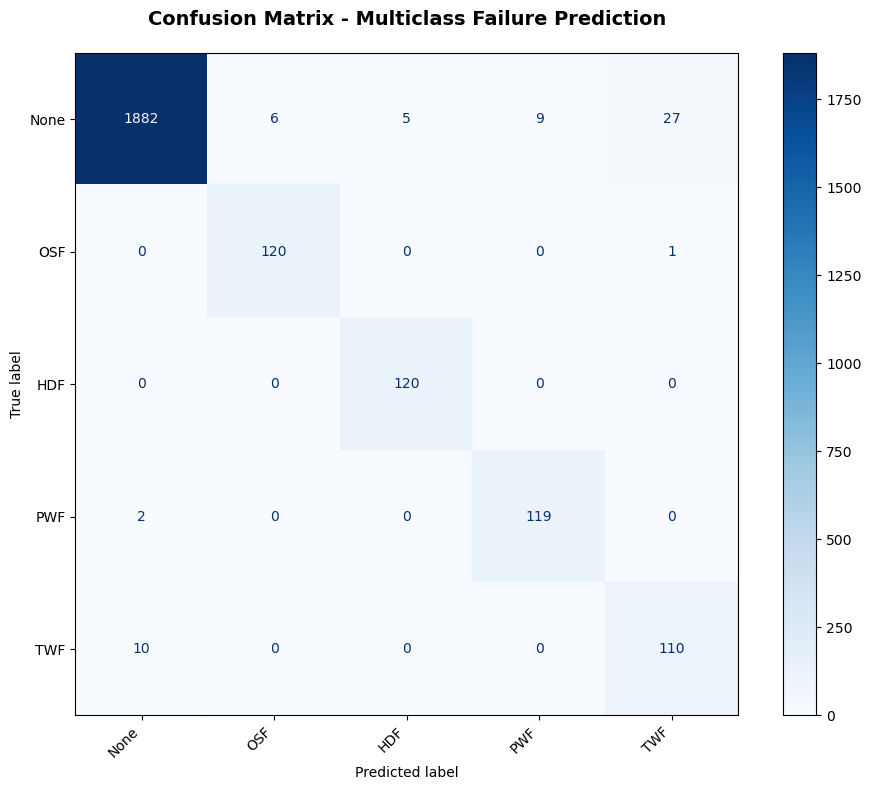

In [80]:
# Confusion Matrix Visualization
fig, ax = plt.subplots(figsize=(10, 8))

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=failure_type_names)
disp.plot(ax=ax, cmap='Blues', values_format='d')

ax.set_title('Confusion Matrix - Multiclass Failure Prediction', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

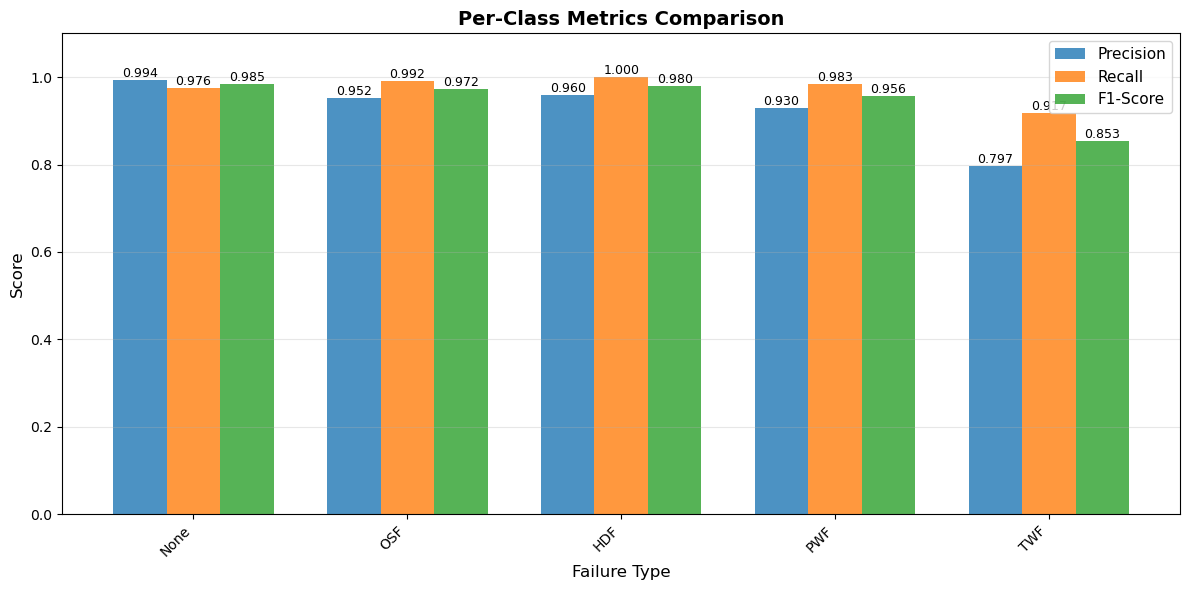

In [81]:
# Per-class metrics visualization
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(all_labels, all_preds)

# Create bar plot for per-class metrics
x = np.arange(len(failure_type_names))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width, precision, width, label='Precision', alpha=0.8)
bars2 = ax.bar(x, recall, width, label='Recall', alpha=0.8)
bars3 = ax.bar(x + width, f1, width, label='F1-Score', alpha=0.8)

ax.set_xlabel('Failure Type', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Per-Class Metrics Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(failure_type_names, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(True, axis='y', alpha=0.3)
ax.set_ylim([0, 1.1])

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [82]:
# Summary metrics
print("\n" + "="*60)
print("OVERALL METRICS SUMMARY")
print("="*60)
print(f"Overall Accuracy:     {accuracy_score(all_labels, all_preds):.4f}")
print(f"Macro Avg Precision:  {precision_score(all_labels, all_preds, average='macro'):.4f}")
print(f"Macro Avg Recall:     {recall_score(all_labels, all_preds, average='macro'):.4f}")
print(f"Macro Avg F1-Score:   {f1_score(all_labels, all_preds, average='macro'):.4f}")
print(f"\nWeighted Avg Precision: {precision_score(all_labels, all_preds, average='weighted'):.4f}")
print(f"Weighted Avg Recall:    {recall_score(all_labels, all_preds, average='weighted'):.4f}")
print(f"Weighted Avg F1-Score:  {f1_score(all_labels, all_preds, average='weighted'):.4f}")
print("="*60)


OVERALL METRICS SUMMARY
Overall Accuracy:     0.9751
Macro Avg Precision:  0.9266
Macro Avg Recall:     0.9735
Macro Avg F1-Score:   0.9489

Weighted Avg Precision: 0.9769
Weighted Avg Recall:    0.9751
Weighted Avg F1-Score:  0.9757


In [83]:
# Save the trained model
import datetime
import json

# Create timestamp for unique filename
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# 1. Save model state dictionary (recommended - smaller file, more flexible)
model_path = f"predictive_maintenance_model_{timestamp}.pth"
torch.save(model.state_dict(), model_path)
print(f"✓ Model state dict saved to: {model_path}")

# 2. Save complete model (includes architecture)
full_model_path = f"predictive_maintenance_full_model_{timestamp}.pth"
torch.save(model, full_model_path)
print(f"✓ Full model saved to: {full_model_path}")

# 3. Save training history and metrics
training_history = {
    'train_losses': train_losses,
    'train_accuracies': train_accuracies,
    'val_losses': val_losses,
    'val_accuracies': val_accuracies,
    'final_metrics': {
        'accuracy': accuracy_score(all_labels, all_preds),
        'macro_precision': precision_score(all_labels, all_preds, average='macro'),
        'macro_recall': recall_score(all_labels, all_preds, average='macro'),
        'macro_f1': f1_score(all_labels, all_preds, average='macro'),
        'weighted_precision': precision_score(all_labels, all_preds, average='weighted'),
        'weighted_recall': recall_score(all_labels, all_preds, average='weighted'),
        'weighted_f1': f1_score(all_labels, all_preds, average='weighted')
    },
    'model_config': {
        'input_dim': input_dim,
        'output_dim': output_dim,
        'architecture': str(model),
        'optimizer': 'Adam',
        'learning_rate': 0.001,
        'weight_decay': 1e-4,
        'batch_size': 64,
        'epochs_trained': len(train_losses)
    },
    'timestamp': timestamp
}

history_path = f"training_history_{timestamp}.json"
with open(history_path, 'w') as f:
    # Convert numpy arrays to lists for JSON serialization
    history_to_save = {
        'train_losses': [float(x) for x in train_losses],
        'train_accuracies': [float(x) for x in train_accuracies],
        'val_losses': [float(x) for x in val_losses],
        'val_accuracies': [float(x) for x in val_accuracies],
        'final_metrics': {k: float(v) for k, v in training_history['final_metrics'].items()},
        'model_config': training_history['model_config'],
        'timestamp': timestamp
    }
    json.dump(history_to_save, f, indent=4)
print(f"✓ Training history saved to: {history_path}")

print("\n" + "="*60)
print("MODEL SAVING COMPLETE")
print("="*60)
print(f"Files created:")
print(f"  1. {model_path} (for loading with model.load_state_dict())")
print(f"  2. {full_model_path} (standalone model)")
print(f"  3. {history_path} (training metrics)")
print("="*60)

✓ Model state dict saved to: predictive_maintenance_model_20260214_164943.pth
✓ Full model saved to: predictive_maintenance_full_model_20260214_164943.pth
✓ Training history saved to: training_history_20260214_164943.json

MODEL SAVING COMPLETE
Files created:
  1. predictive_maintenance_model_20260214_164943.pth (for loading with model.load_state_dict())
  2. predictive_maintenance_full_model_20260214_164943.pth (standalone model)
  3. training_history_20260214_164943.json (training metrics)


## Loading the Saved Model (for future use)

To load the model later, use one of these methods:

In [ ]:
# Example: How to load the saved model (run this in a new session)

# Method 1: Load state dict (recommended)
# loaded_model = PredicMaint(input_dim=5, output_dim=5)
# loaded_model.load_state_dict(torch.load('predictive_maintenance_model_YYYYMMDD_HHMMSS.pth'))
# loaded_model.eval()

# Method 2: Load full model
# loaded_model = torch.load('predictive_maintenance_full_model_YYYYMMDD_HHMMSS.pth')
# loaded_model.eval()

# Method 3: Load training history
# with open('training_history_YYYYMMDD_HHMMSS.json', 'r') as f:
#     history = json.load(f)
#     print(f"Model accuracy: {history['final_metrics']['accuracy']}")

print("Model loading examples ready (uncomment to use)")